# Veriye Genel Bakis

**Proje Amaci**  
Verimizde hedef degiskenimiz kategorik bir degiskendir

**Veri Hakkinda Genel Bilgi**  
**age**: Bireyin yasini yil cinsinden ifade eder.  
**fnlwgt**: Her bir satirin temsil ettigi kisi sayisini ifade eder.  
**education**: Bireyin egitim duzeyini ifade eder.    
**education.num**: Bireyin aldigi egitim yilini sayisal olarak ifade eder.  
**marial.statis**: Bireyin medeni durumunu ifade der.  
**occupation**: Bireyin meslegini ifade eder.  
**relationship**: Ailenin icindeki rolu gosterir.(Ornek: Husband,wife gibi,not-in-family gibi)  
**race**: Bireyin etnik kokenini ifade eder.  
**sex**: Bireyin cinsiyetini ifade eder.  
**capital.gain**: Bireyin bir yil icinde elde ettigi sermaye kazancini dolar cinsinden ifade eder. 
**capital.loss**: Bireyin bir yil icinde yasadigi sermaye kaybini  dolar cinsinden ifade eder.  
**hours.per.week**: Bireyin bir haftada calistigi toplam saat sayisini ifade eder.  
**native.country**: Bireyin dogdugu ulkeyi ifade eder.   
**income**: Bireyin yillik gelir durumunu iki siniftan biri olarak ifade eder(<=50K >50K 50.000dolardan esit ve fazla veya 50.000 dolardan az)


Veri hakkinda genel bilgi edinmek icin su fonksiyonlari kullanabiliriz:  

**df.shape** — Verinin satir ve sutun sayisini gosterir.  
**df.dtypes** — Her sütunun veri tipini gösterir.  
**df.head()** — Verinin ilk 5 satirini gosterir.(mesela icine 3 yazarsak ilk 3 satirini gonderir.)  
**df.tail()** — Verinin son 5 satirini gosterir.  
**df.isnull().sum()** — Her sutundaki eksik (null) degerlerin sayisini verir.  
**df.describe().T** — Sayisal sutunlarin ozet istatistiklerini (ortalama, medyan, min, max vb.) satir bazinda gosterir.  
(Ben her verimde bu ozellikleri kullanacagim icin bir fonksiyon uzerinden calistirmayi tercih ettim.)



In [1]:
import warnings
warnings.filterwarnings('ignore') #Kod calisirken uyari mesajlarini gizlemek icin.
import pandas as pd
df = pd.read_csv('/Users/Feyza/Downloads/adult.csv')
pd.set_option('display.width',500) #Veriyi daha genis ekranda tam olarak gormek icin
pd.set_option('display.max_columns',None) #Tum sutunlarin eksiksiz olarak gorunmesi icin
def check_df(dataframe,head=5,quantiles=False):
    a=[0, 0.05, 0.50, 0.95, 0.99, 1]
    print("##################### Shape #####################")
    print(dataframe.shape) 
    print("##################### Types ############")
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head (head))
    print("##################### Tail #####################")
    print (dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    if quantiles:
        print(dataframe. describe(a). T)
    else:
        print(dataframe.describe().T)
check_df(df)


##################### Shape #####################
(32561, 15)
##################### Types ############
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
##################### Head #####################
   age workclass  fnlwgt     education  education.num marital.status         occupation   relationship   race     sex  capital.gain  capital.loss  hours.per.week native.country income
0   90         ?   77053       HS-grad              9        Widowed                  ?  Not-in-family  White  Female             0          4356              40  United-States  <=50K
1   82   Private  132870       HS-grad              9        Widowed    Exec-managerial  No

Kodlardan elde edindigim bilgiler:  

1-Aslinda eksik veri sayisi sifir gibi gozukse de ? olan yerler eksiktir.  
2-Hedef degiskenimin turu kategorik. Bu yuzden gorsellestirme vb. yerlerde buna dikkat edilmelidir.   
3- Education ve education.num benzer ozelliklere sahip gibi duruyor veride karisiklik olmamasi icin,sayisal degiskenin kalmasi amaciyla educationu silinebilir ama bunun test edilmesi gerekiyor.   
4- Fnlwgt degiskeninin icinde cok fazla sinif var. Bu degiskenin hedef degiskene olan katkisina bakilmali(buyuk ihtimal yok) yoksa da silinmelidir.  
5- Quantiles kismina bakildigi zaman veride asiri degerler ve degiskenlerin dagilimi goz onuna alindiginda karar agaclari ve gradient boosting gibi modeller daha uygun olacaktir.  


Degiskenlerin adlarinda . var ben bu degiskenlerle ugrasirken zorlanmamak icin . olan yerleri _ cevirecegim. .replace(a,b) degiskendeki butun a degerlerini b ye donusturur,

In [2]:
df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'], dtype='object')

# Eksik Deger Analizi

Eksik degerlerle basa cikmak icin farkli yontemler vardir: 

En basit yontem, eksik degerleri iceren satirlari **silmektir.** Ancak bu veri kaybina yol acabilir.(Dikkat: Satırların silinmesi, o satırlardaki diğer değişkenlerin de silinmesine ve dolayısıyla bu değişkenlerle ilgili olası bilgi kaybına yol açabilir)  
Alternatif olarak, eksik degerler uygun sekilde **doldurulabilir** (ortalama, medyan veya en sik deger ile). Secilen yontem veri setinin ozelliklerine ve analiz amacina baglidir.

**? Eksik Deger Olarak Sayma**  

Ustte goruldugu gibi eksik degerler NAN ile degil de ? isareti olarak gosterildigi icin eksik degerlerimizin sayisi 0 olarak kabul ediliyor. Bu yuzden once bunlari np.nan ile eksik veri haline getirmemiz gerekiyor.

In [3]:
print('? eksik deger olarak saymadan once')
print(df.isnull().sum())
import numpy as np
df = df.replace("?", np.nan)
print('? eksik deger olarak saydiktan sonra')
print(df.isnull().sum())



? eksik deger olarak saymadan once
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
? eksik deger olarak saydiktan sonra
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Goruldugu gibi 3 tane degiskenimiz var. Her degiskeni kendi ozelinde inceleyip eksik degerlere ne yapacagimiza karar vermemiz gerekiyor.

Eksik degerleri daha iyi anlayabilmek icin missingno.matrix() ve seaborn heatmap gorsellestirme yontemlerini kullaninir.

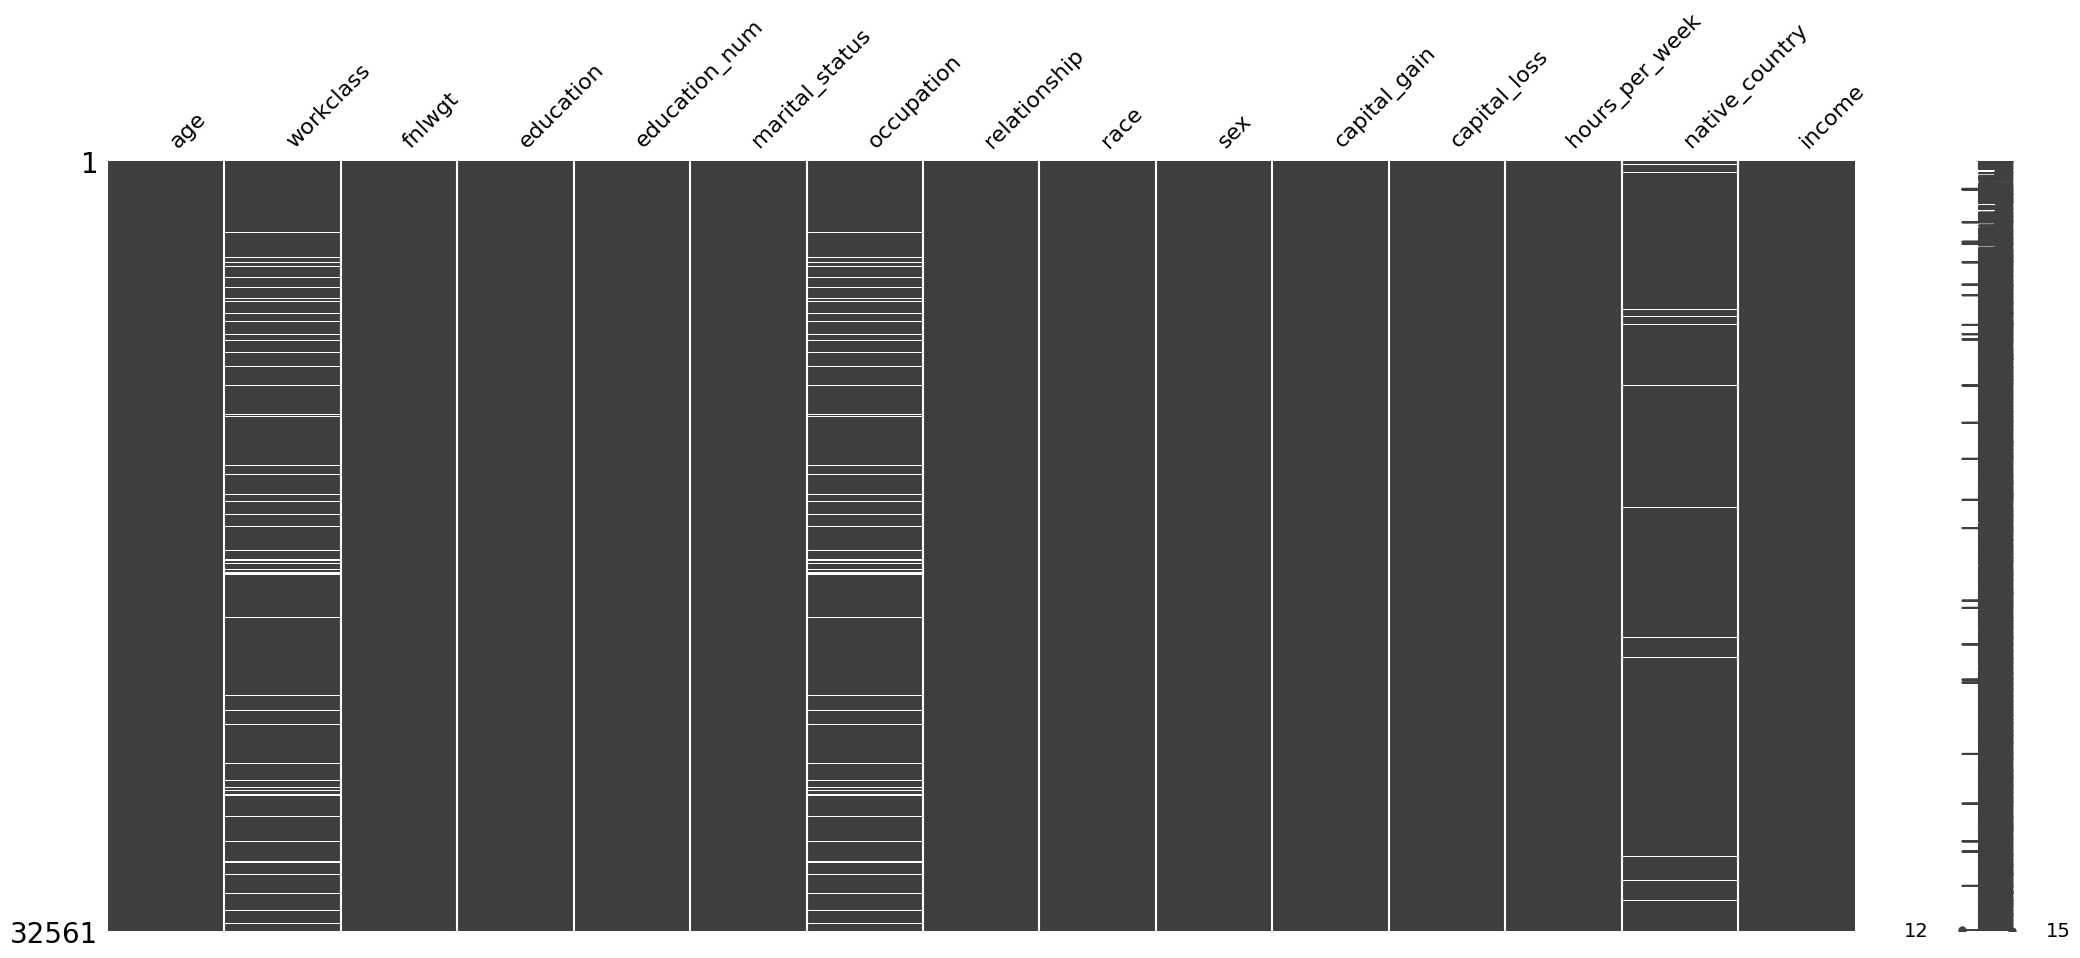

In [4]:
import missingno as msno
msno.matrix(df);

Burada workclass degiskenindeki eksikliklerin oldugu satirda occupationun da eksiklikleri oldugu goruluyor Bu da bu iki değiskenin eksik veri yapisinda (cok buyuk ihtimalle) bir ortaklik oldugunu gosterir.

**workClass**

Ilk olarak hedef degiskenin dagilimina bakalim.

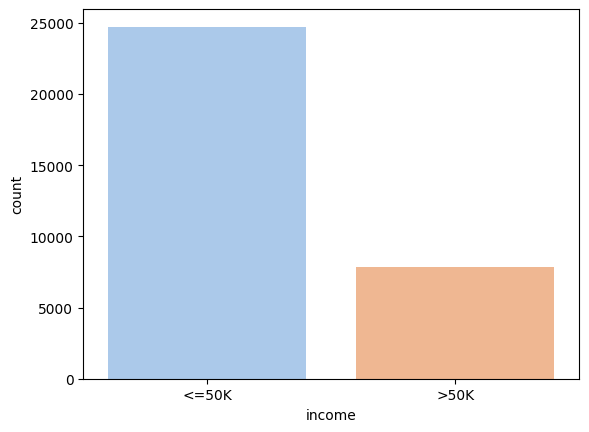

In [5]:
import seaborn as sns
sns.countplot(x='income',data=df,palette='pastel');

Grafige bakilinca 50.000 dolardan fazla alanlarin sayisi 50.000 dolardan az olanlara gore oldukca az gozukuyor bu da 50.000 dolardan az olan satirlar konusunda dikkatli olmamiz o degisken hakkindaki dagilima bakarak silme islemi gerekiyorsa yapmamiz gerektigini gosteriyor. Aksi halde verimiz daha cok dengesizlesebilir.

Hedef degiskenimizdeki dagilimin yuzdeligine sayisal olarak bakalim.

In [6]:
df['income'].value_counts(normalize=True)*100


income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

Workclasstaki eksik degerlere silme islemi uygularsak dagilim nasil degisir ona bakalim.

In [7]:
df[df['workclass'].notna()]['income'].value_counts(normalize=True) * 100


income
<=50K    75.101709
>50K     24.898291
Name: proportion, dtype: float64

Hedef degiskenin total yuzdeligi ile workclasss degiskenindeki oranlar neredeyse ayni cok cok kucuk bir fark var. Bu yuzden ben direkt silme islemini kullanmak istiyorum ama son bir adim olarak eksik degerlerimin oldugu satirlar toplam satirlarin yuzde kacini olusturuyor ona bakmam lazim eger cok buyuk bir kismini olusturuyorsa ona gore farkli bir yontem uyguulamaya gecebilirim cunku ustte bahsettigim gibi aslinda diger degiskenleri de silmis oluyorum.

In [8]:
print(f'Workclass degiskenindeki eksik degerlerin totala olan yuzdesi {df['workclass'].isna().sum()/len(df)*100}')


Workclass degiskenindeki eksik degerlerin totala olan yuzdesi 5.638647461687294


Yuzde 5lik oran cok yuksek olmadigi icin silme yontemi uygulanabilir(bana gore). Bu satirlari silersem occupationdaki eksik verilerin de neredeyse tamami silinecektir grafik yardimiyla bu fark edilmisti.

In [9]:
df = df[df['workclass'].notna()]
print('Silinme isleminin kontrolu ve diger eksik degerlere tekrardan bakilmasi icin:')
print(df.isnull().sum())

Silinme isleminin kontrolu ve diger eksik degerlere tekrardan bakilmasi icin:
age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          7
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64


Workclass degiskenindeki eksik degerler basariyla silinmis ve ocuupationdaki eksik deger 7 tane kalmis. Bunlari da silmekte sakinca yoktur.

**occupation**

In [10]:
df = df[df['occupation'].notna()]
print('Silme isleminin kontrolu:')
print(df.isnull().sum())

Silme isleminin kontrolu:
age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64


**native_country**

Bunda da ilk olarak silme islemine bakmak icin Workclass degiskeninde uygulanilan yontemi buna da uygulayacagim.

Hedef degiskenin dagilimi

In [11]:
df['income'].value_counts(normalize=True) * 100


income
<=50K    75.096035
>50K     24.903965
Name: proportion, dtype: float64

native_country degiskenindeki eksik degerleri silinmesi durumunda hedef degiskenin dagilimi

In [12]:
df[df['native_country'].notna()]['income'].value_counts(normalize=True) * 100


income
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64

Bunda da cok yakin bir deger cikti. Aslinda bu son degiskende bu beklenilebilir cunku toplam satir uzunlugunun yaninda 500 eksik deger sayisi biraz az. Yine de aslinda eksik degerlerin genel orana benzer sekilde olmasinda da buyuk fayda var. Bunu da kanitlayalim.

Eksik degerlerin hedef degisken dagilimi

In [13]:
df[df['native_country'].isna()]['income'].value_counts(normalize=True) * 100


income
<=50K    74.460432
>50K     25.539568
Name: proportion, dtype: float64

Bu yuzden 3.degiskenimde de silme islemini uygulayacagim.

In [14]:
df = df[df['native_country'].notna()]
print('Tum veride eksik deger kontrolu')
print(df.isnull().sum())

Tum veride eksik deger kontrolu
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Simdi basta satir satim 32.561di. Silme isleminden sonra kalan sayi:

In [15]:
print(f'Basta satir sayisi 32.561di. Silme isleminden sonra kalan sayi:{len(df)}')

Basta satir sayisi 32.561di. Silme isleminden sonra kalan sayi:30162


En son bir ornek gostermek icin burada verimi kopyaliyorum.

In [16]:
df3=df.copy()

**Aykiri Gozlem Analizi**

Boxplot grafiği, verideki aykırı gözlemleri kolayca gormemizi saglar. Kutu disindaki noktalar, siradisi degerleri yani aykiri gozlemleri temsil eder. Boylece veri dagilimindaki uc degerleri hizlica fark edebiliriz. x=df['sutunadi'] diyerek, grafikte göstermek istedigimiz veri sütunundaki degerleri belirtiyoruz. Sayisal sütunlarda kullaniriz cunku aykiri degerler ancak sayisal veride anlamli olur.

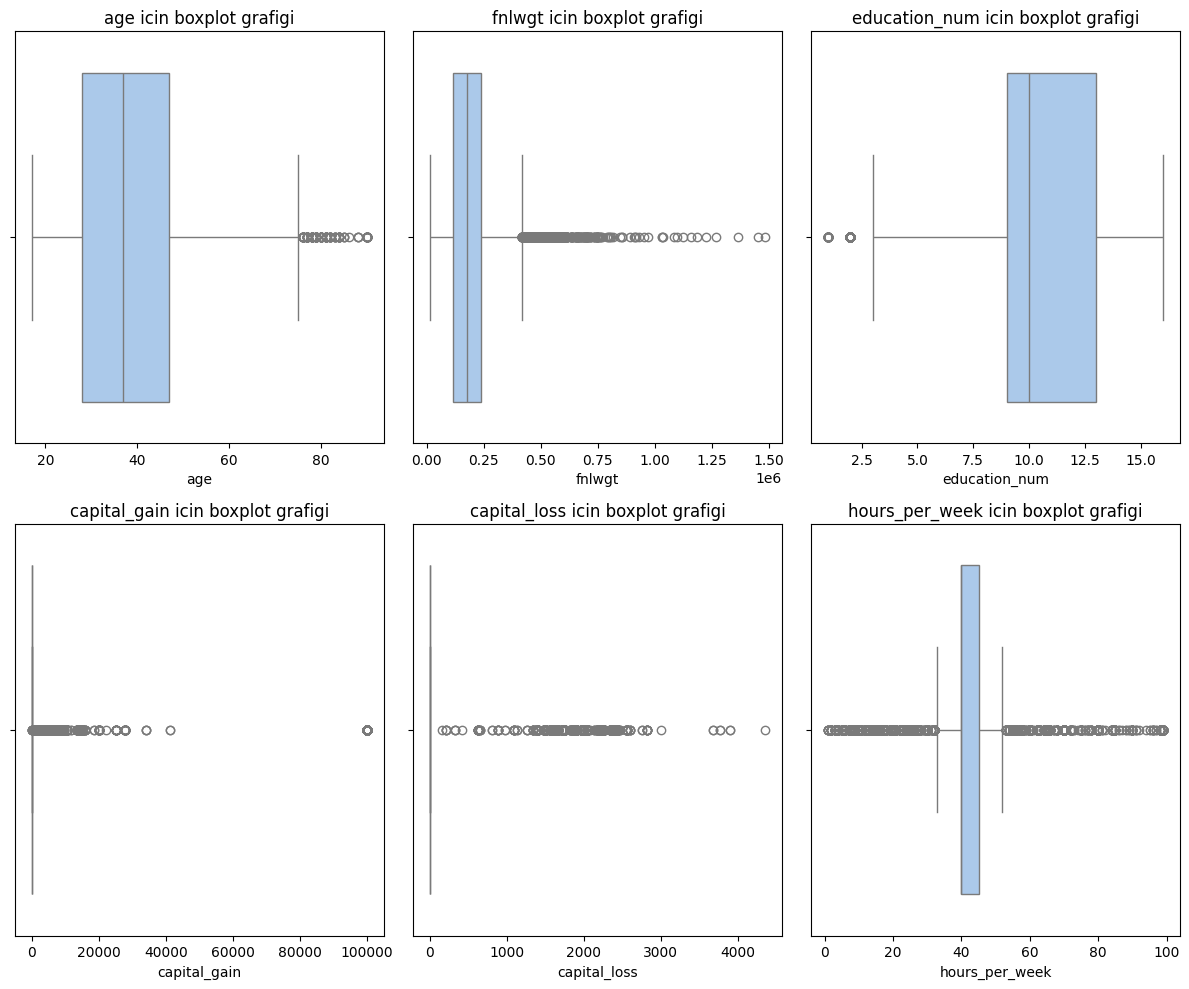

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
import math
n = len(num_cols) #Sayisal sutunlarin sayisi

cols = 3 #Grafiklerde sutun sayisini 3 olarak belirledim 6 tane degisken oldugu icin
rows = math.ceil(n / cols) #satir sayisini hesapla.

plt.figure(figsize=(12, 5 * rows)) #Grafik alaninin boyutu genislik 12 yukseklik satir sayisina gore

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols,i)
    sns.boxplot(x=df[col],palette='pastel') 
    plt.title(f'{col} icin boxplot grafigi', fontsize=12)
    plt.tight_layout()

plt.show()



Bu veride agac tabanli modellemeler kullanacagim icin aykiri degerlere cok dokunmak istemedim en son modelimin performansini artirmak icin belki bakabilirim.

# Veri Gorsellestirme

(Gorsellestirme de hepsi tek bir yerde gozuksun diye(subplot) kodumu yapay zekaya verip konumlarini ayarlamasini istedim.)

## Sayisal Degiskenler

Korelasyon, iki degisken arasindaki iliski veya baglantinin gucunu ve yönünü ifade eder. Pozitif korelasyonda bir degisken artinca digeri de artar, negatif korelasyonda ise biri artarken digeri azalir. Sayisal degiskenler arasindaki bu iliskiyi renklerle gosteren grafiklere korelasyon (isi) haritasi denir. heatmap fonksiyonu, bu korelasyon matrisini renkli tablo olarak cizer. annot=True parametresi, her kare icine korelasyon degerlerinin yazilmasini saglayarak sayilari da görmemizi sağlar.(1 1 1 1 diye capraz gitmesinin sebebi her degiskenin kenisiyle kolerasyonunn bir olmasindan kaynaklaniyor.)

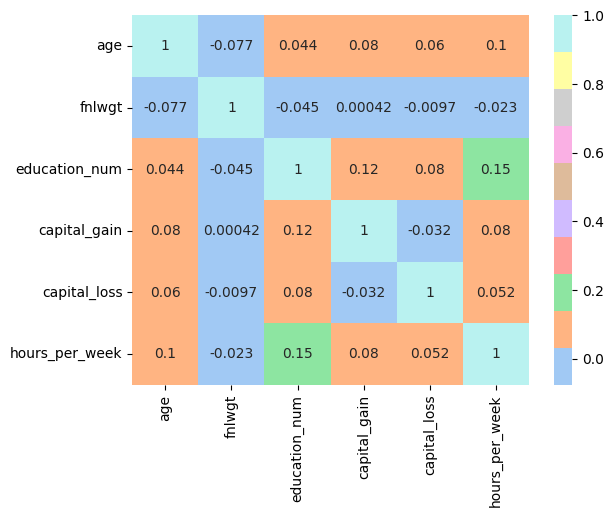

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=[int, float]).corr()
cmap = sns.color_palette("pastel", as_cmap=True) #rengi pastel donlarda gormek istedigim icin
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()




Grafige bakarsak ssayisal degiskenler arasinda dusuk kolerasyon oldugunu varsayabiliriz.(Genelde iki degisken arasindaki kolerasyonun mutlak degeri 0.5 veya daha buyukse kolerasyn var deriz.) Cunku en yuksek kolerasyon degeri education_)num ve hours_per_week arasindaki deger olan 0.15 degeridir.Bundan su sonuclari cikartabiliriz:  
Degiskenler arasinda kolerasyonun dusuk olmasi XGBoost icin avantaj saglar cunku model her degiskenden bagimsiz bilgi ogrenebilir ama hedef degskenimizle diger degiskenler arasinda da hep dusuk bir iliski varsa modelin gucunu dusurebilir.

**Sayisal Degiskenlerin Hedef Degisken Etrafinda Dagilimi**

Aslinda kategorik ve sayisal degiskenler arasinda dogrudan kolerasyon hesaplanabilir (örn: ANOVA, point biserial, eta² gibi), ancak bizim amacimiz hedef degiskenle sayisal degiskenler arasindaki iliskiyi gormek oldugu icin barplot kullanmak daha anlamli ve yorumlayicidir.  

Alttaki kodda **means** degiskeninin kisaca ozeti: **groupby** hedef degisken income’a gore kirilim yapar, her grup icin sayisal degiskenin ortalamasini alir. reset_index() ile sonucu tabloya ceviririz cunku barplotta data=means olarak **DataFrame** vermek gerekir.

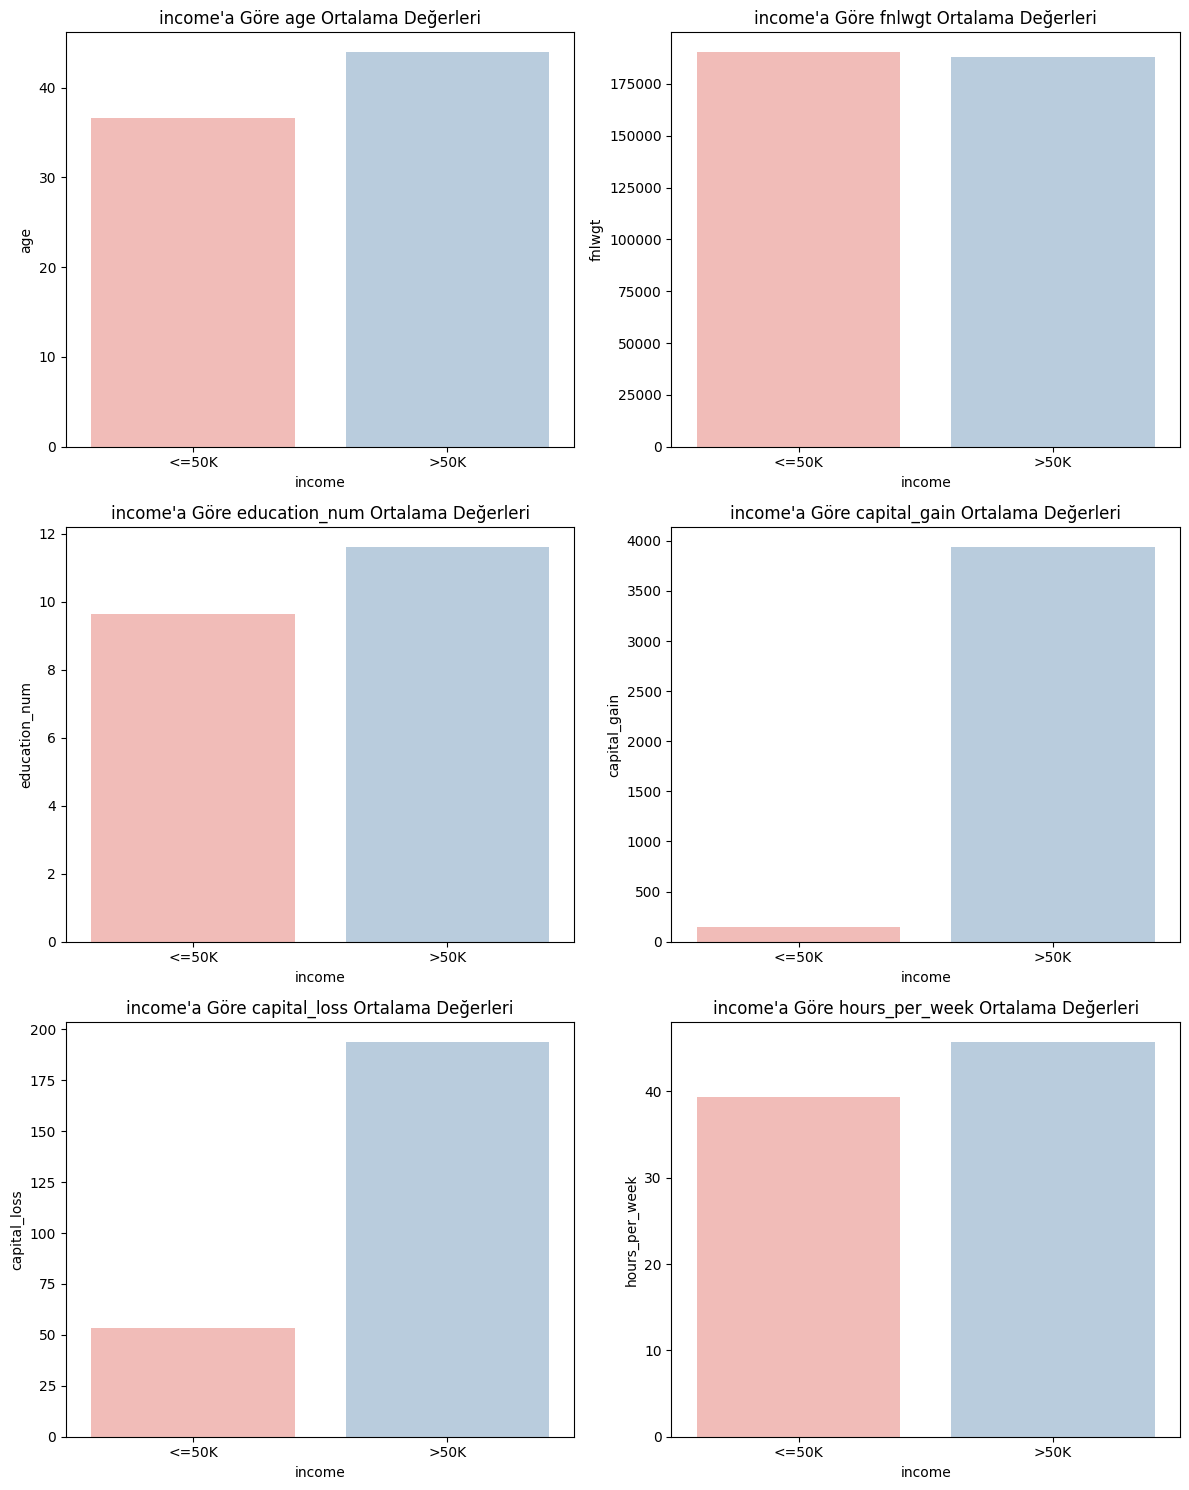

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols=df.select_dtypes(include=[int,float]).columns

fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3 satır, 2 sütun grafik alanı

for i, col in enumerate(num_cols):
    means = df.groupby('income')[col].mean().reset_index()
    sns.barplot(x='income', y=col, data=means, palette='Pastel1', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"income'a Göre {col} Ortalama Değerleri")

plt.tight_layout()
plt.show()


Grafikleri yorumlayacak olursam:  

**Education_num** degiskeninin hedef degiskende ortalama farkinin cok az olmasi egitim seviyesinin gelir uzerinde beklenenden az etkisi oldugunu gosteriyor(Ben biraz daha fark beklerdim.)  
Maasi yuksek olan kisilerin hem sermaye kazancinin(**capital_gain**) hem de kaybinin(**capital_loss**) fazla olmasi, finansal olarak daha aktif ve riskli yatirimlar yaptiklarini gosterir.  

Grafiklerde en dikkatimi ceken **fnlwgt** degiskeni oldu.**Fnlwgt** degiskeninde,hedef degisken kiriliminda ortalama neredeyse ayni. Ayrica fnlwgt degiskeninin benzersiz sinif sayisi diger sayisal degiskenlere gore cok fazla. 



In [20]:
print(f' fnlwgt degiskeninde benzersiz sinif sayisi {df['fnlwgt'].nunique()}')

 fnlwgt degiskeninde benzersiz sinif sayisi 20263


Bu yuzden makine ogrenmesinde veriyi hazirlarken bu degiskeni cikartacagim.

## Kategorik Degiskenler

Kategorik degiskenler icin pasta ve cubuk grafikler:  
**Pie chart** kategorik degiskenlerin yuzdelik dagilimini verir.  
**Countplot** hedef degiskene gore kategorik sinif sayilarini gosterir.  
Renkler kategorileri ve hedef gruplari ayirt etmek icin kullanilir.  
Bunlar kategorik degiskenlerin hedefle iliskisini anlamaya yardimci olur.  

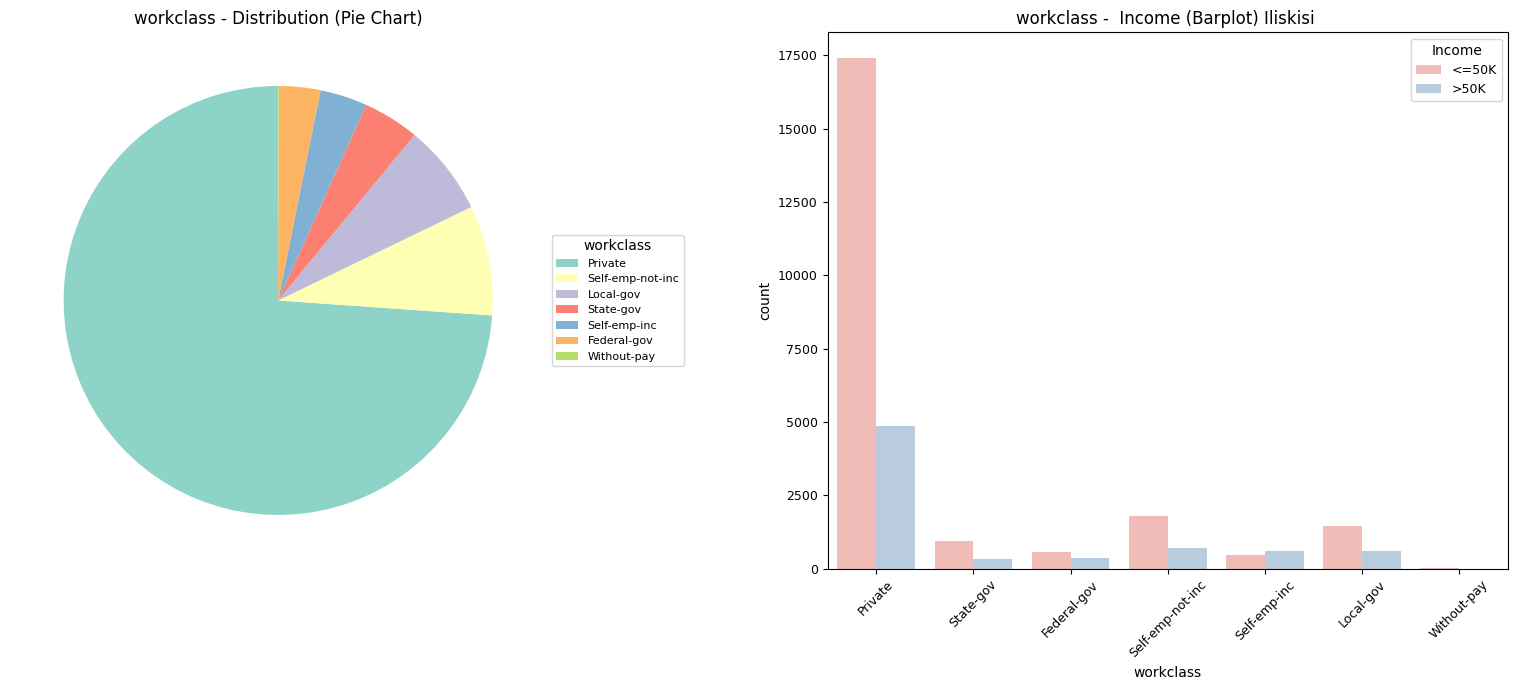

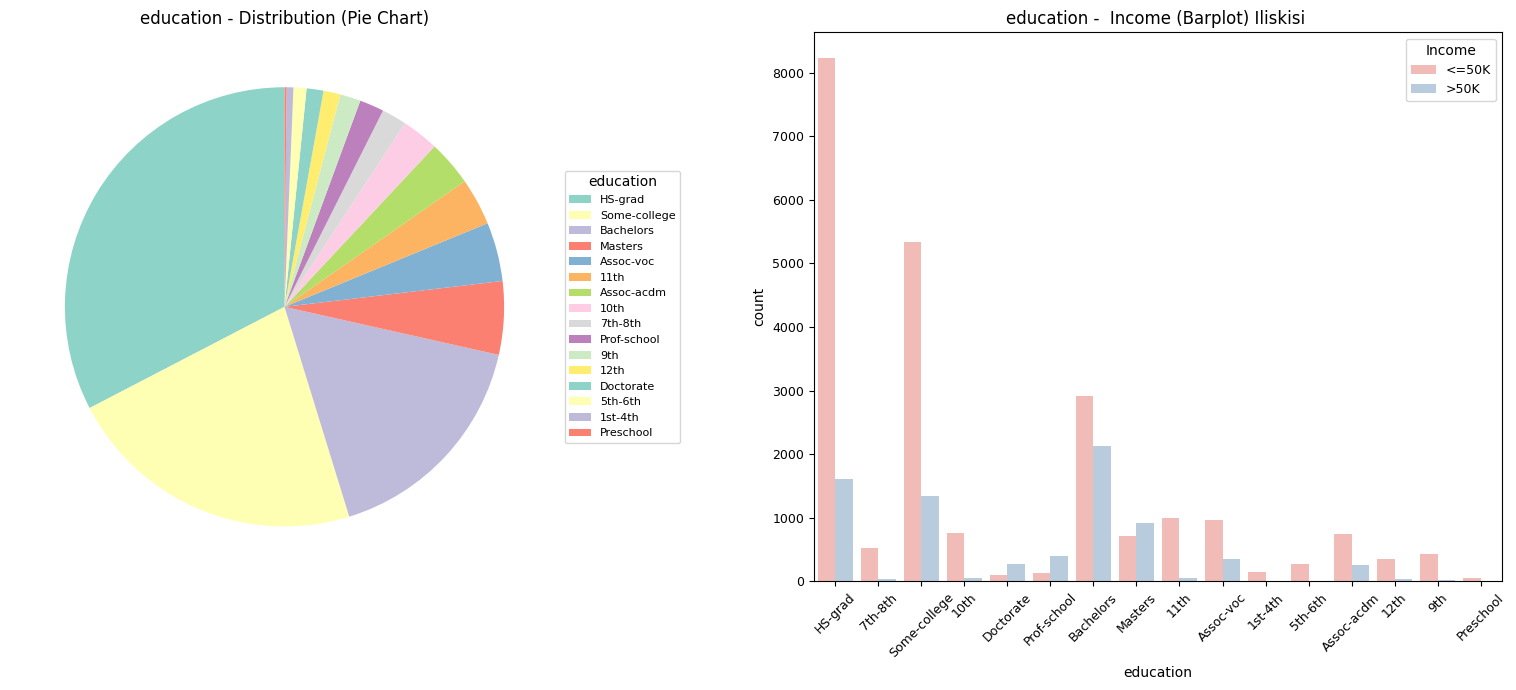

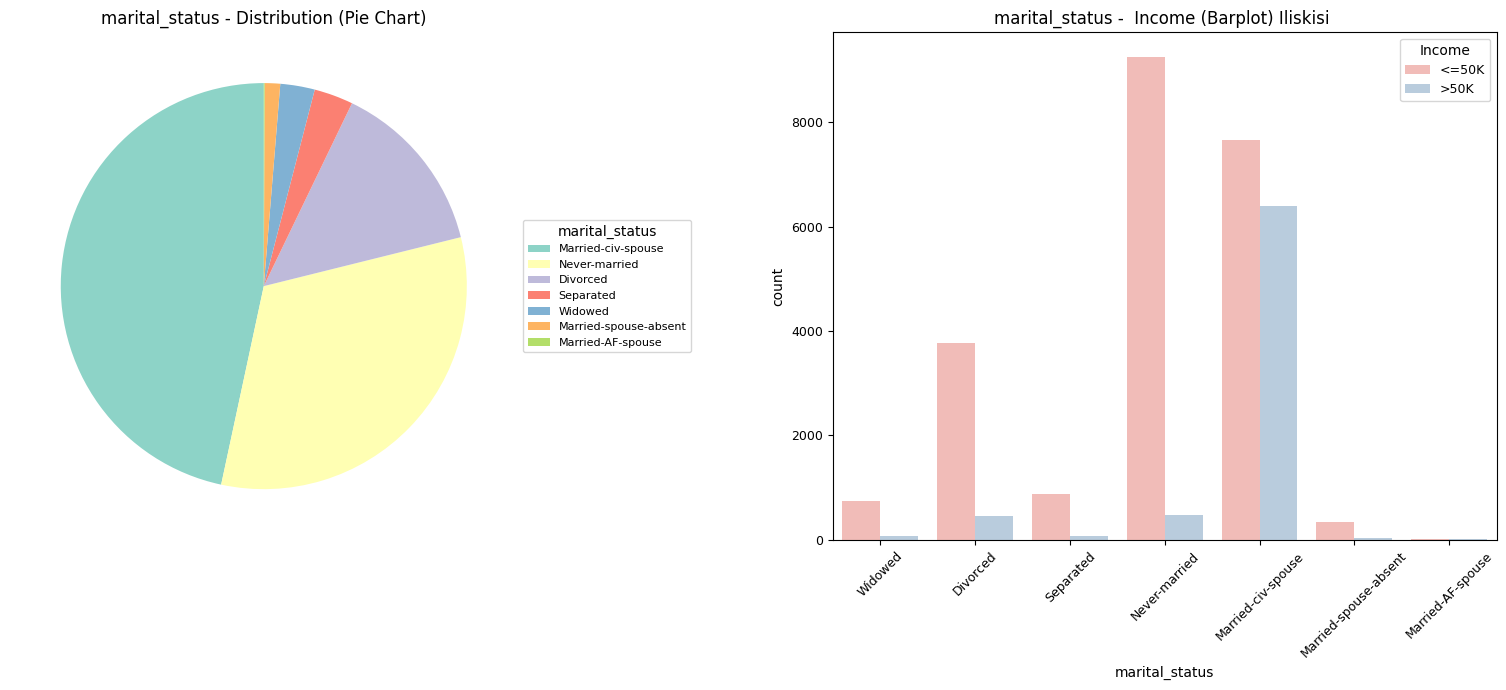

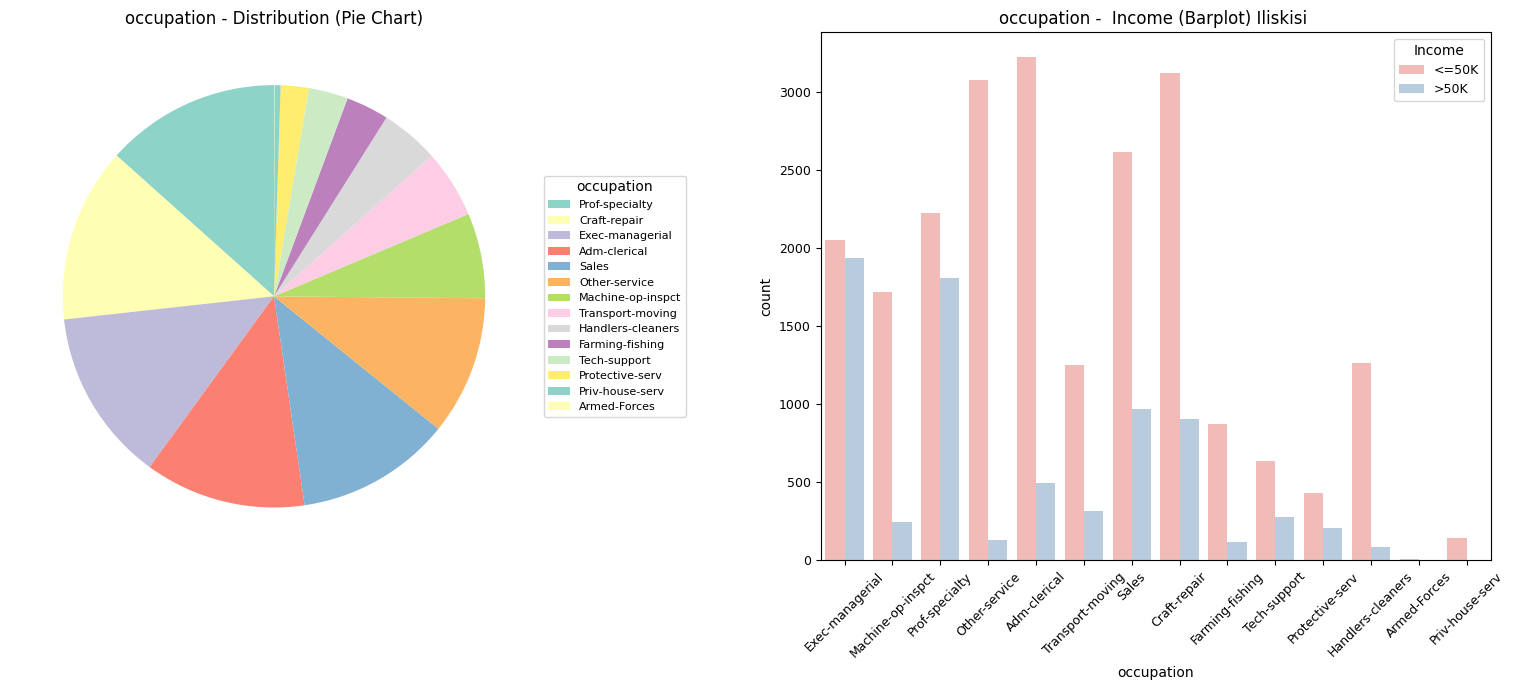

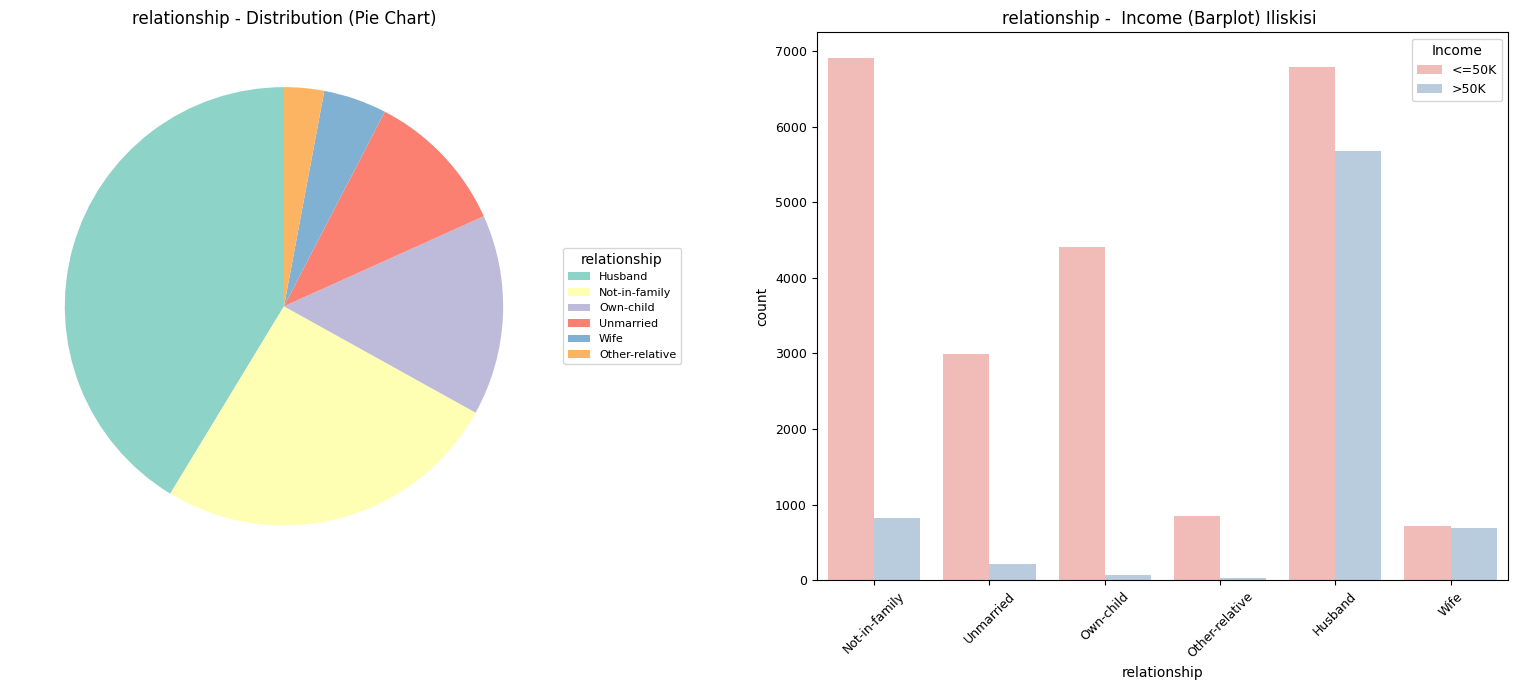

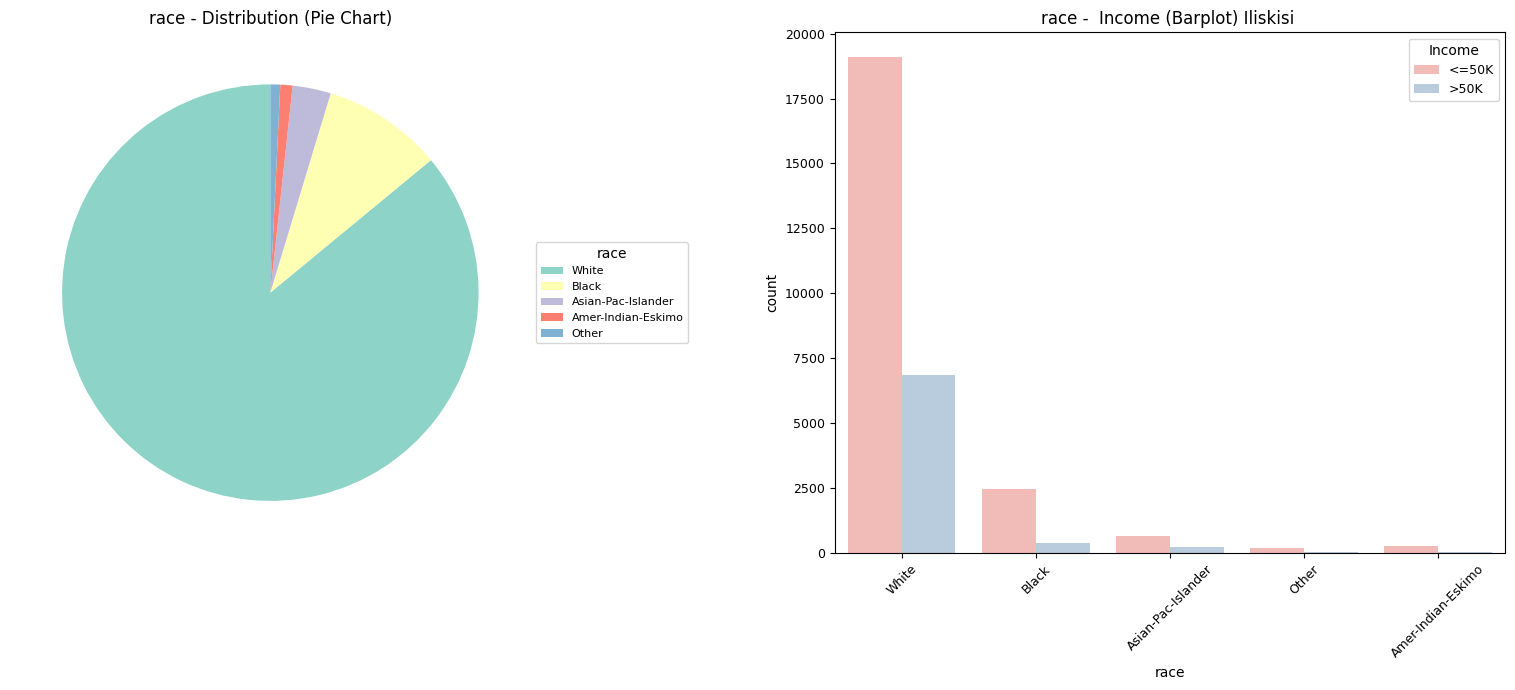

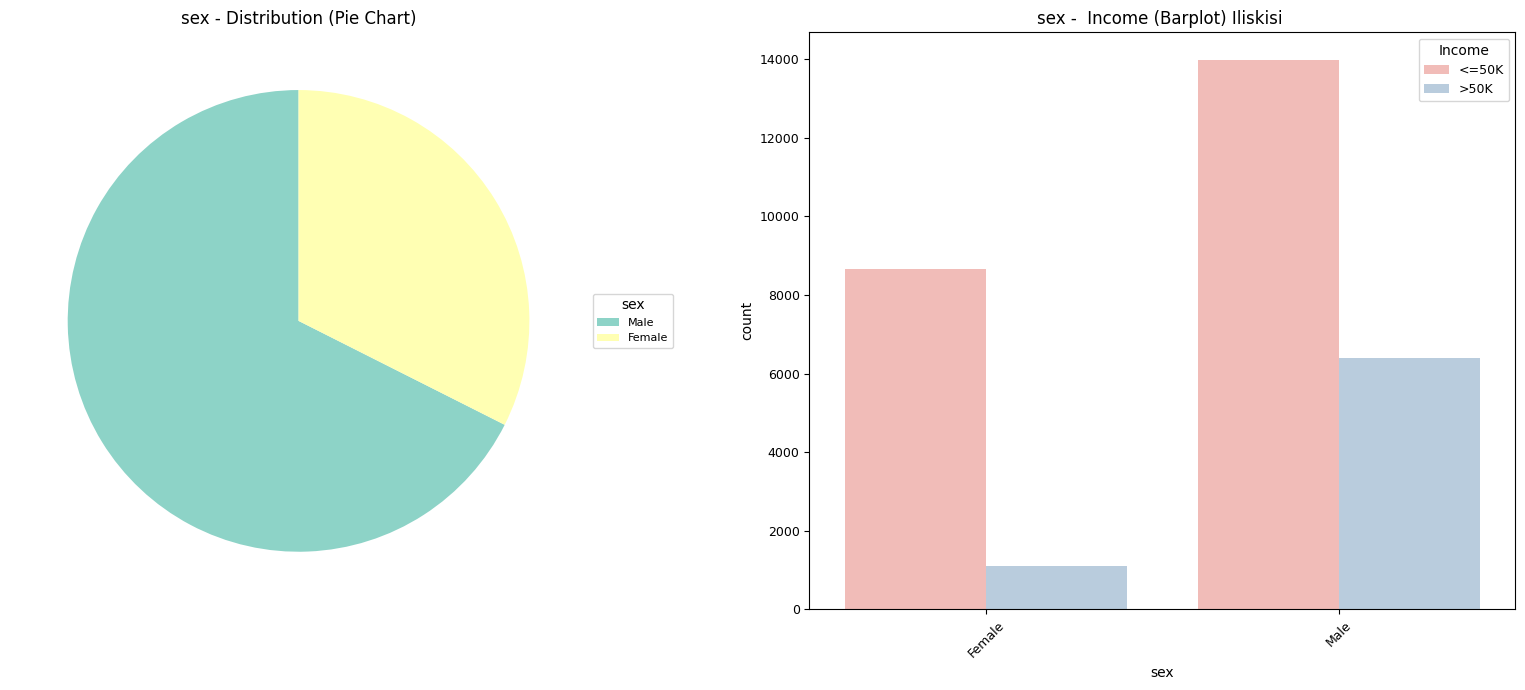

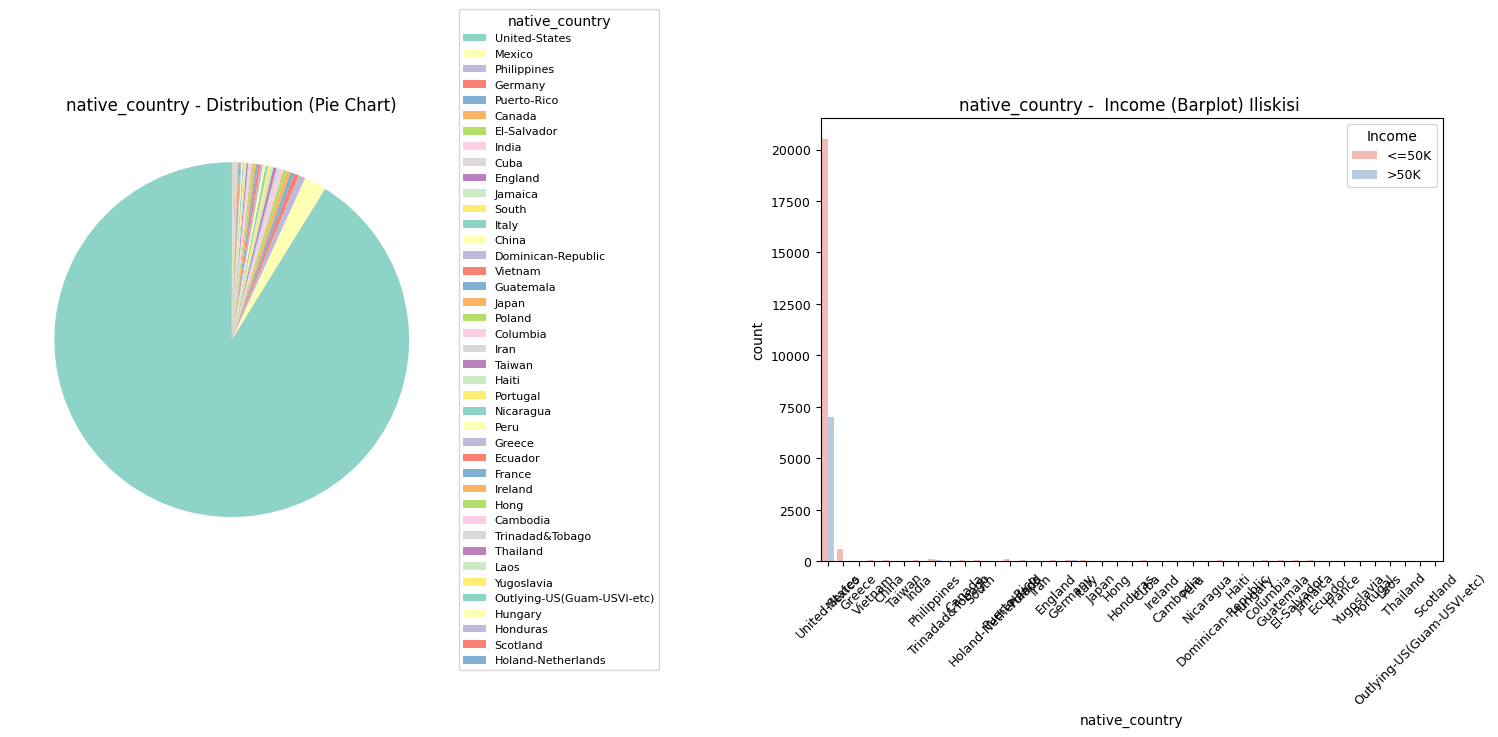

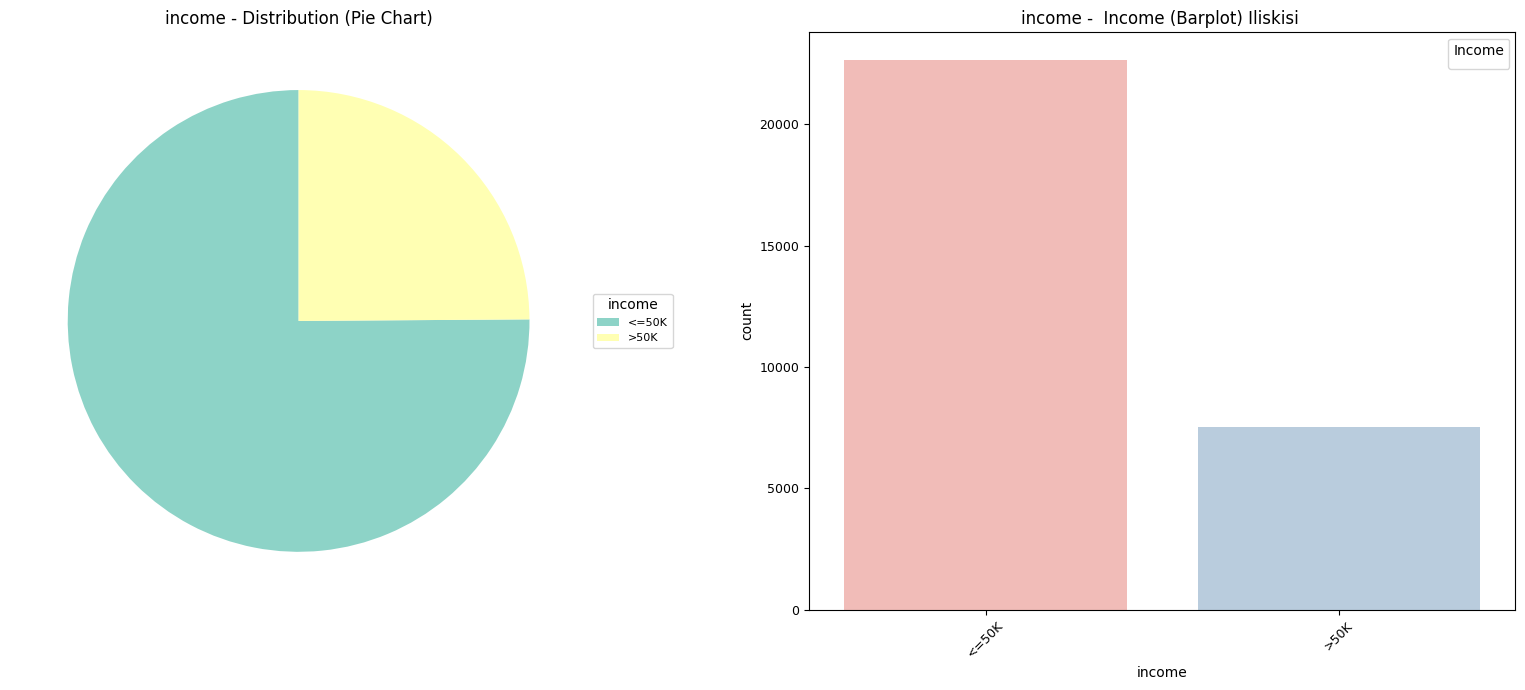

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))

    counts = df[col].value_counts() #O sutundaki her kateogri icin frekans sayisini al.
    colors = sns.color_palette('Set3', len(counts))
    wedges, texts = axs[0].pie(
        counts, #Her dilimin buyuklugu o kategorinin frekansina bagli.
        startangle=90, #Pasta grafiginin baslangic acii
        textprops={'fontsize': 9}, #Pasta uzerindeki yazilarin boyutu
        colors=colors
    ) #pasta grafigi olsutur

#Grafigin yaninda ahngi renk hangi kategoriye ait aciklamasi yapmak icin alttaki iki satiri yazdik.
    axs[0].set_title(f'{col} - Distribution (Pie Chart)', fontsize=12)
    axs[0].legend(wedges, counts.index, title=col, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
#wedges: dilim renkleri, count.index:kategorilerin isimleri title=col: Legend basligi olarak sutun adi loc=#legendin yerlesimi bbox_to_ancho grafik alaninin biraz diisna koyarak yerlestirilmesi
    sns.countplot(x=col, hue='income', data=df, ax=axs[1], palette='Pastel1')
#hue=income hedef degiskene gore renk ayari
    axs[1].set_title(f'{col} -  Income (Barplot) Iliskisi ', fontsize=12)
    axs[1].tick_params(axis='x', rotation=45, labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)
    axs[1].legend(title='Income', fontsize=9)

    plt.tight_layout()
    plt.show()


Burada da dikkatimi race ve native_country dikkatimi cekti hem benzersiz sinif sayisi cok hem de ikisi de tek bir sinifta yogunlasmis. Bu yuzden bu iki degiskeni de silecegim.

## Kategorik ve Sayısal Değişkenler Arasındaki İlişkilerin Görselleştirilmesi

Verim hakkindaki degiskenleri daha iyi anlamak icin bazi grafikler olusturdum.

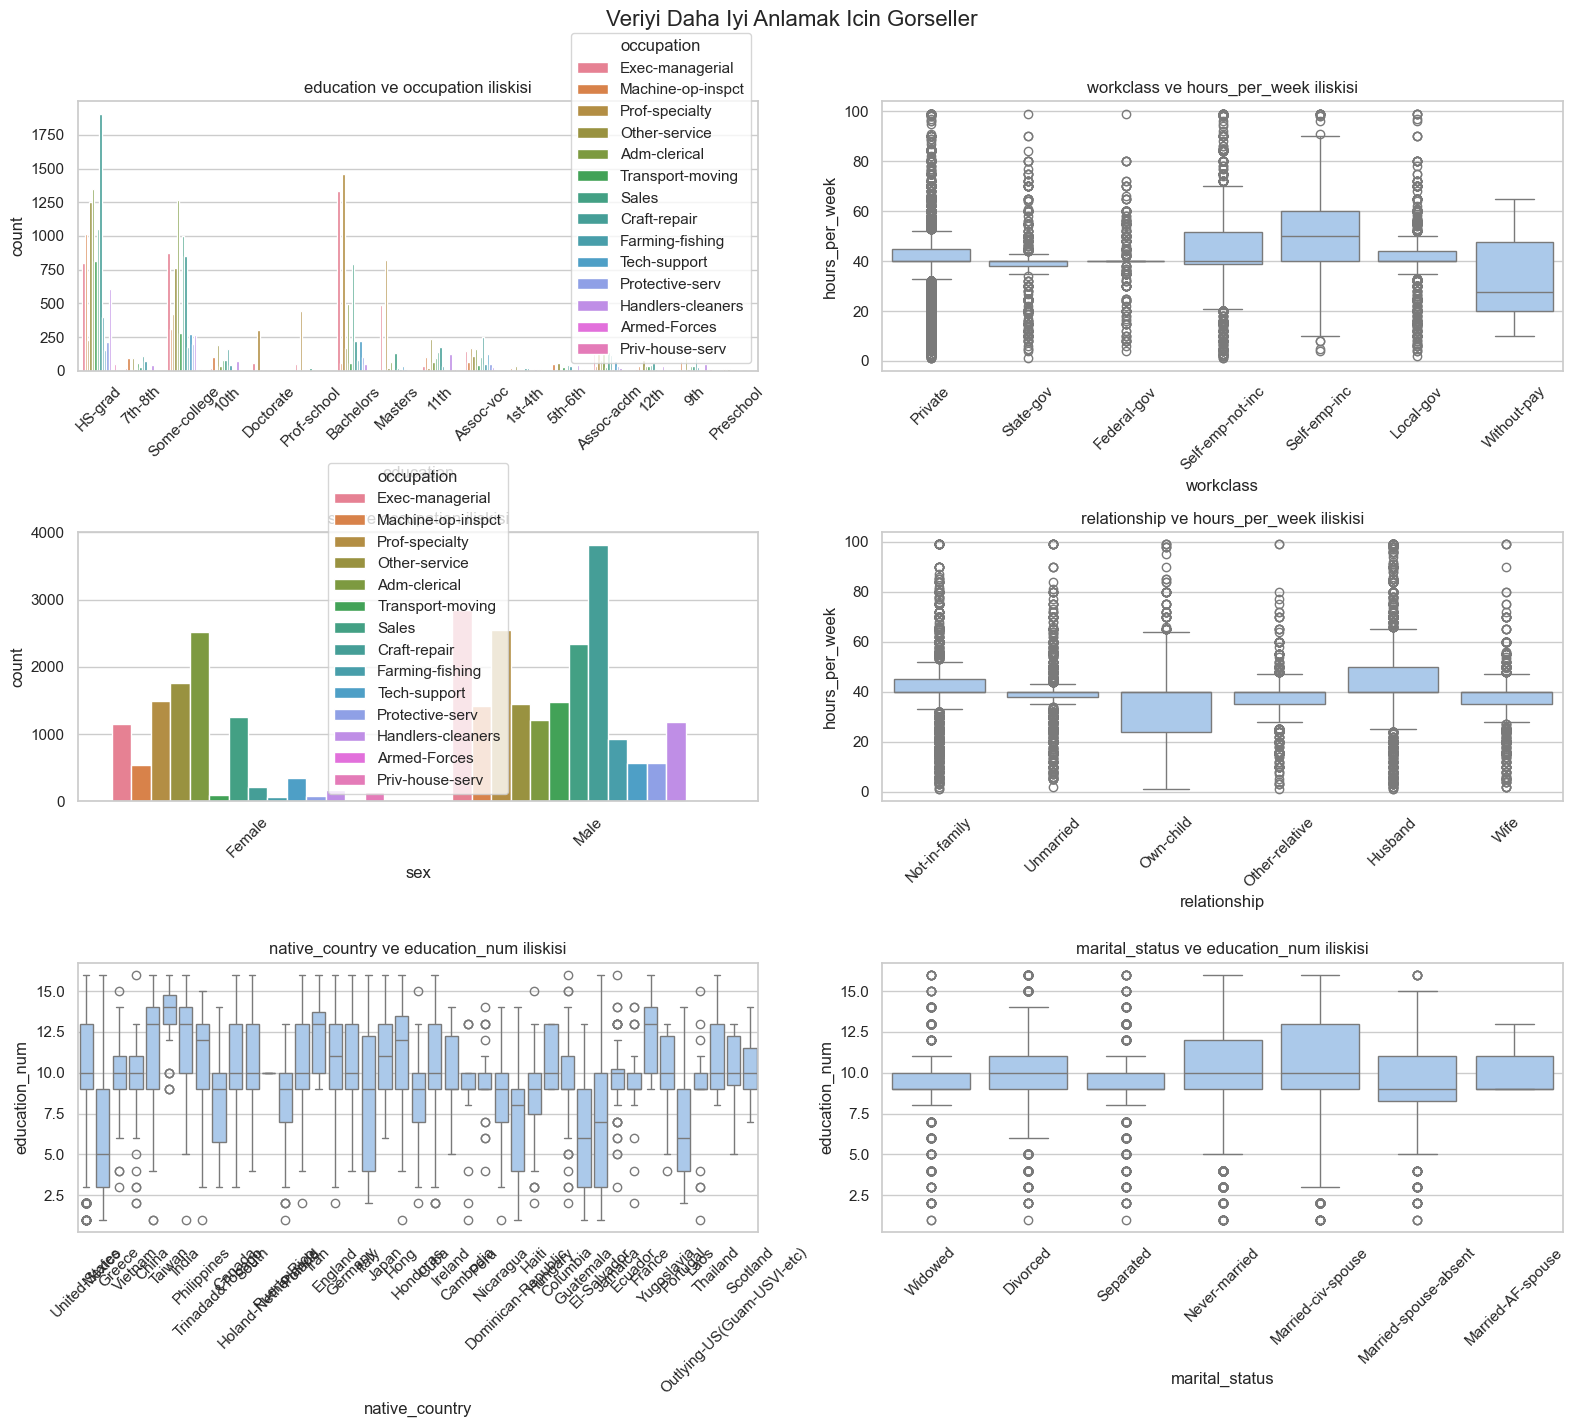

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel')

# Veiiyi daha iyi anlamak icin degiskenlerin birbiri arasindaki iliskileri anlamamiz lazim. Bu yuzden bazi ikili degiskenler olusturdum arasindaki iliskilere bakmak icin.
plot_pairs = [
    ('education', 'occupation'),
    ('workclass', 'hours_per_week'),
    ('sex', 'occupation'),
    ('relationship', 'hours_per_week'),
    ('native_country', 'education_num'),
    ('marital_status', 'education_num')
]



cols = 2 #Bir satirda kac grafik oldugu
rows = (len(plot_pairs) + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
fig.suptitle('Veriyi Daha Iyi Anlamak Icin Gorseller', fontsize=16)


#Her ikili degisken icin liste olusturalim.
for i, (x, y) in enumerate(plot_pairs):
    r = i // cols
    c = i % cols
    ax = axes[r][c] if rows > 1 else axes[c]

    # y kategorikse countplot, sayisalsa boxplot grafigi olsun.
    if df[y].dtype == 'object':
        sns.countplot(x=x, hue=y, data=df, ax=ax)
    else:
        sns.boxplot(x=x, y=y, data=df, ax=ax)

    ax.set_title(f'{x} ve {y} iliskisi', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #Grafiklerin birbirine veya ust basliga cok yaklasmadan duzgunce yerlesmesi icin
plt.show()


1. **education - occupation:**
   Grafiklerde egitim seviyesine gore meslek seciminde belirgin farklar var, bu da egitimin meslek secimini etkileyebilecegini gosteriyor.

2. **workclass - hours\_per\_week:**
   Farkli calisma siniflarinin haftalik calisma saatlerinde anlamli farklar gozlemleniyor, bu da sinifin calisma saatlerini etkileyebilecegini dusunduruyor.

3. **sex - occupation:**
   Cinsiyete gore meslek dagiliminda net farklar var, bu da cinsiyetin meslek seciminde etkili oldugunu gosteriyor olabilir.

4. **relationship - hours\_per\_week:**
   Iliski durumu ile haftalik calisma saatleri arasinda belirgin farkliliklar var, bu sosyal durumun calisma saatlerini etkileyebilecegini dusunduruyor.

5. **native\_country - education\_num:**
   Dogum ulkelerine gore egitim suresinde farklar var, bu da ulkeye bagli olarak egitim seviyelerinin degistigini gosteriyor.

6. **marital\_status - education\_num:**
   Medeni durum ile egitim suresi arasinda bazi farklar var ancak grafiklerde cok belirgin degil, bu da baglantinin zayif olabilecegini isaret ediyor.

Istersen daha farkli sekilde de yazabilirim!


# Model Secimi ve Veriyi Modele Gore Hazirlama

# Model Secimi

Gelir tahmini **ikili siniflandirma** oldugu icin lineer modeller yetersiz kalabilir. Bu nedenle, aykiri degerlere ve dengesiz sinif dagilimina daha duyarlı olan **agac tabanli modelleri** tercih ettim.  
Endustride en cok kullanilan model **XGBoost** oldugu icin ben de bunu kullanmaya karar verdim ayrica diger agac tabanli modellerden olan **Random Forest** ve **Gradient Boosting** modellerinin sonuclarini da karsilastirmak amaciyla paylasacagim. Model skorunu iyilestirmek icin bazi ayarlamalar yapacagim.

**XGBoost**, temel olarak zayif ogrenicilerden (genellikle karar agaclari) olusan bir topluluk (ensemble) yontemidir. Model, once basit bir agacla baslar ve **hatalari ogrenerek** bir sonraki agaci bu hatalari duzeltmek icin egitir.  
Bu surec, modelin hatalari adim adim azalttigi ve daha dogru tahminler yaptigi gradyan artirma (**gradient boosting**) mantigina dayanir. Boylece, XGBoost hem tahminlerde daha basarili olur hem de **karmaşık veri yapilari**ni iyi yakalayabilir.

## Veriyi Modele gore ayarlama

**Emin Oldugum Degiskenleri Silme**

Simdi ilk olarak veri gorsellestirme sonucu cikartmayi dusundugum 3 degisken var: **fnlwgt,race,native_country**   

Emin olmadigim da bir degisken var: **education**. Bu degiskenin education_num ile dogrusal bir iliski olup olmamasina gore silecegim.

(race ve native_country hem cok fazla sinifi olmasi hem de hedef degiskeniyle ilgininin cok az olmasi nedeniyle sildik ama onlarda bir sinif cok fazla olduug icin belki o sinif ve digerleri donumu yapsak nasil olur diye modleimi olusturduktan sonra deneyecegim. Boylece benzersiz sinif sayisini 2ye dusurmus oluruz cunku.Bunun icin orijinal veriyi kopyalacagim)

In [23]:
df1=df.copy()

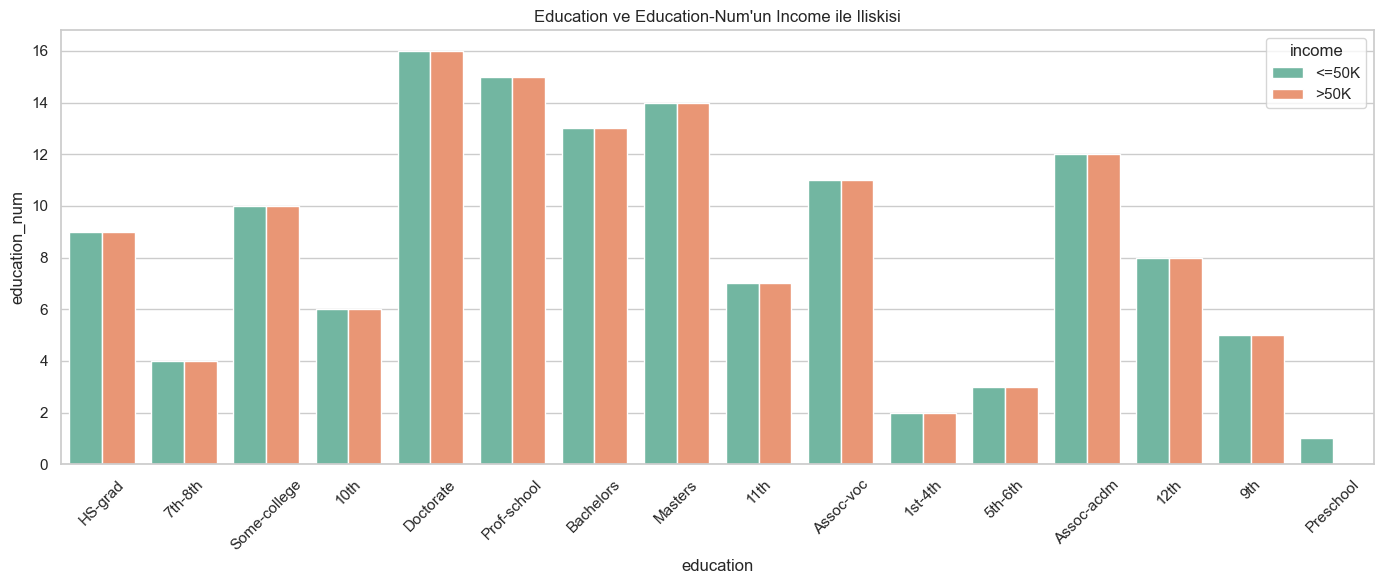

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='education', y='education_num', hue='income', palette='Set2')

plt.xticks(rotation=45)
plt.title("Education ve Education-Num'un Income ile Iliskisi")
plt.tight_layout()
plt.show()


Grafikte de goruldugu gibi birbirleri arasinda kolerasyon neredeyse %100. O yuzden bunun da silinmesi daha mantikli olur.

In [25]:
df.drop(['native_country','fnlwgt','education','race'],axis=1,inplace=True)

Bu kod veriden belirtilen sutunlari **kalici** olarak silmeyi saglar.  
**‘axis=1’** sutunlari secmek icin, **‘inplace=True’** degisikligi dogrudan df uzerinde yapmak icindir.

**Kategorik Degiskenleri Donusturme**

Makine öğrenmesi modellerinde, kategorik verilerin sayısal forma dönüştürülmesi gereklidir; bu dönüşüm, verinin nominal veya ordinal olmasına göre uygun yöntemlerle yapılır. Nominal veriler için genellikle One-Hot Encoding gibi sıralama içermeyen yöntemler tercih edilirken, ordinal verilerde ise kategoriler arasındaki doğal sıralamayı koruyan Ordinal Encoding veya Target Encoding gibi yöntemler kullanılır.

Agac tabanli modeller (**Random Forest, Gradient Boosting)** icin kategorik degiskenlerde **Label Encoding** genellikle yeterlidir. Bu modeller sayisal etiketleri iyi isler ve One-Hot Encoding gibi karmaşik donusumlere gerek yoktur. Bu yontem hem verimliligi artirir hem de iyi performans saglar.

Simdi kategorik degiskenlerimi tekrar secip onlari labelEncoder ile sayisallastiracagim.

In [26]:
cat_cols=df.select_dtypes(include=['object','category']).columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Bu kod, kategorik (metin) sütunlardaki her farklı değeri sayısal bir etikete dönüştürür; böylece makine öğrenmesi modelleri bu veriyi kullanabilir.

Simdi verimi test verisine bolmeden onca sayisal olmayan degiskenim kalmis mi onu komtrol edecegim.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   education_num   30162 non-null  int64
 3   marital_status  30162 non-null  int64
 4   occupation      30162 non-null  int64
 5   relationship    30162 non-null  int64
 6   sex             30162 non-null  int64
 7   capital_gain    30162 non-null  int64
 8   capital_loss    30162 non-null  int64
 9   hours_per_week  30162 non-null  int64
 10  income          30162 non-null  int64
dtypes: int64(11)
memory usage: 2.8 MB


Verim artik makine ogrenmesi icin hazir hale geldi.

# Makine Ogrenmesi Model Secimi

Benim veri setimde hedef degisken kategorik ve siniflar arasinda yaklasik 3’e 1’lik bir dengesizlik var. Ayrica sayisal degiskenlerde de fazlasiyla aykiri deger bulunuyor. Bu yuzden aykiri degerlere karsi guclu oldugu icin agac tabanli modelleri tercih etmek istedim. Bu konuda XGBoost ve benzeri modeller en iyilerden biridir.  
Bu yuzden XGBoost’u tercih etmek istiyorum cunku yuksek dogruluk orani sagliyor ve dengesiz siniflarda etkili parametre ayarlari yapabiliyor. Endustri projelerinde de yaygin olarak kullanilmasi, gercek dunyadaki karmasik verilerle basa cikma gucunu gosteriyor. Bu model, hem hiz hem de verimlilik acisindan avantajli oldugu icin benim icin en uygun secenek.

Her ne kadar XGBoost benim icin en uygun model gibi gorunse de, bazen diger modeller daha iyi sonuclar verebiliyor. Bu projemde en yuksek dogruluk oranini elde etmek istedigim icin, hangi modeli sececegime daha guvenilir karar verebilmek amaciyla k-katli capraz dogrulama yontemini kullanacagim.

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore")
X = df.drop('income', axis=1)
Y = df['income']

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=72)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {}

for name, model in models.items():
    scores = cross_val_score(model, train_X, train_Y, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name} CV Accuracy: {scores.mean()} (+/- {scores.std():})")

best_model_name = max(results, key=results.get)
print(f"\nEn iyi model: {best_model_name} - Dogruluk: {results[best_model_name]:}")


Logistic Regression CV Accuracy: 0.8166748635881804 (+/- 0.0020962263418617916)
Random Forest CV Accuracy: 0.845055507520358 (+/- 0.002654519367737754)
SVM CV Accuracy: 0.798417691281856 (+/- 0.003807523797665927)
XGBoost CV Accuracy: 0.8658769875580695 (+/- 0.004305111851624884)
Gradient Boosting CV Accuracy: 0.8588036793333039 (+/- 0.0019149698878803815)
KNN CV Accuracy: 0.8386015895579622 (+/- 0.003974863483652982)
Decision Tree CV Accuracy: 0.8109723073015129 (+/- 0.004751944734563147)
AdaBoost CV Accuracy: 0.8443923970866246 (+/- 0.0011417284036943556)

En iyi model: XGBoost - Dogruluk: 0.8658769875580695


**Neden X ve Y olusturduk**  

df.drop('sutunadi',axis=1) demek sutunlardan sutunadi olan satiri cikar demektir inplace=True yapmadigmiz surece verimizde kalici degisiklige neden acmiyordu. Makine ogrenmesinde biz hedef degiskenimizdeki verileri bir yerde diger degiskenleri de farkli bir yerde tutmaliyiz. Bu yuzden X ve Y degiskenlerini olusturduk genelde makine ogrenesinde Y hedef degiskenimiz olur

**train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=72) ne anlama geliyor?**  

Bir modelin ogrenebilmesi ve basarisinin gosterebilmesi icin iki temel veri setine ihtiyac vardir:  

**Egitim Seti:** Model bu veri setindeki ornekleri kullanarak nasil tahmin yapacagini ogrenir.  
**Test Seti:** Model, egitim sirasinda hic gormedigi bu veri seti uzerinde ogrendiklerini sinar ve tahmin yapar.  

**testsize=0.25** demek veri setinin yuzde 25ini test icin ayir demek(Gendel boyle yazildigi icin ben de yuzde 25 yazdim bazen 33 gibi sayilar gormustum)  
Veri setindeki genellikle rastgele bolunur ancak **random_state** parametresi kullanildiginda bu rastgelelik sabitlenir ve her calistirmada ayni egitim ve test setleri olusturulur.  

**train_test_split nedir?**  
rain_test_split, scikit-learn kutuphanesinin (sklearn.model_selection modulu) icinde bulunan bir fonksiyondur.  

**train_X, test_X, train_Y, test_Y ne anlama geliyor?**  
Burada aslında direkt degisken isimlerinden ne anlama geldigini anlayabiliriz. Mesela train_X egitim icin ozellikleri, test_Y ise test icin hedef degiskeni tutar. Bu degisken isimlerini kendimiz degistirebiliriz ama sirasini kesinlikle karistirmamaliyiz.

**models sozlugunu nicin olusturduk**  
Sozluklerde dict.items() metodu bir for dongusunde kullanildiginda her seferinde iki deger dondurur: ilki anahtar (key), ikincisi deger (value olur). Biz modelimizi test ederken hangi modeli kullandigimizi gostermek icin model adinin string olarak alinmasi gerekir. Model nesnesi ise dogrudan cagrilir, bu yuzden model adini string olarak tutmaliyiz ama onu model nesnesine cevirmemeliyiz.

**for dongusu**  

Bu kodda amacimiz farkli makine ogrenmesi modellerinin hangisinin veri setimizde en iyi sonucu verdigini belirlemek. **for name, model in models.items()**: ile her model uzerinde **tek tek capraz dogrulama** uyguluyoruz. Capraz dogrulama **(cv=5)** kullanmamizin sebebi, modelin performansini sadece tek bir bolme uzerinden degil, 5 farkli bolmede test ederek daha guvenilir ve genellenebilir bir skor elde etmek.  

Her bolmedeki dogruluk skorlarini scores degiskeninde topluyoruz ve bu skorlarin ortalamasini **(scores.mean())** almak, modelin genel basarisini tek bir rakama indirgememizi sagliyor; bu sayede istatiksel **dalgalanmalardan ariniriz**. Standart sapmayi **(scores.std())** da yazdirarak performansin ne kadar **tutarli** oldugunu da goruyoruz.  

Sonuclari results sozlugune kaydederek tum modellerin performanslarini karsilastirmaya hazir hale getiriyoruz. En yuksek ortalama dogruluk skoruna sahip modeli max(results, key=results.get) ile buluyoruz; bu da bize hangi modelin veri setimize en uygun oldugunu net sekilde gosteriyor. Boylece kararimizi sadece tek test sonucuna degil, genis bir degerlendirme sonucuna dayanarak veriyoruz.


**Kodun Yorumlanmasi**  
Ustte de verimde agac tabanli modellerin dogruluk oraninin neden yuksek cikacagini anlatmistim. Sonuclar da bunu dogruluyor. En yuksek parametre gelistirmek istedigim XGBoost ciktigi icin ayrica sevindim. Simdi ilerideki asamlarda modelimin hiperparametrelerini degsitirip skoru artirmaya calisacagim.(Burada cok fazla sinif sayisi olan iki degiskeni direkt silmsitim eger silmeseydim ne olurdu ona da bakmak istiyorum)

# Model Skorunu Artirmak Icin Hiperparametre Optimizasyonu

## Giris

Hiperparametre optimizasyonuna gecmeden once XGBoost modeli hakkinda biraz bilgi vermek istiyorum:   

**n_estimators**: Olusturulacak toplam agac sayisini belirler.  
**learning_rate**: Her agacin modele katkisini kontrol eder; dusuk degerler daha yavas ama daha dikkatli ogrenme saglar.  
**max_depth**: Her agacin maksimum derinligini belirler; modelin karmasikligini duzenler.   
**eval_metric**: Modelin basarisini olcmek icin kullanilan metrik; siniflandirmada genellikle logloss tercih edilir.  
**random_state**: Rastgele islemler icin sabit bir baslangic noktasi belirleyerek sonuclarin tekrarlanabilirligini saglar.  

(Makine ogrenmesinde agac veriyi dallara ayirarak karar verme sureci olusturan bir yapidir)

Bizim iyilestirmeye calistigimiz performans olcutleri:  


**Accuracy**: modelinin toplamda ne kadar dogru tahmin yaptigini gosterir. Ancak veri dengesizse, yani bir sinif digerinden cok daha fazlaysa, accuracy yaniltici olabilir cunku model hep cogunluk sinifini tahmin ederek yuksek accuracy elde edebilir.  
**F1 Score precision**: (pozitif tahminlerin ne kadari dogru) ve recall (gercek pozitiflerin ne kadari yakalandi) arasinda denge kurar. Harmonik ortalamadir ve dengesiz veride daha guvenilir performans gostergesi olur.  
**ROC AUC Score**: modelin siniflari ne kadar iyi ayirdigini belirtir. 0.5 rastgele tahmin anlamina gelir, 1.0 ise mukemmel ayirma. Tum esik degerlerde performansi gozler.  

In [29]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

X = df.drop("income", axis=1)
Y = df["income"]
results = []


for state in range(1, 101): #random_state degerleri icin
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=state)

    model = xgb.XGBClassifier(eval_metric="logloss")

    param_grid = {
        "n_estimators": [100, 150, 200],
        "learning_rate": [0.1, 0.2],
        "max_depth": [3, 4, 5],
        "random_state": [state]
    }

    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
    grid.fit(train_X, train_Y)

    best_model = grid.best_estimator_
    pred_Y = best_model.predict(test_X)
    prob_Y = best_model.predict_proba(test_X)[:, 1]

    accuracy = accuracy_score(test_Y, pred_Y)
    f1 = f1_score(test_Y, pred_Y)
    roc_auc = roc_auc_score(test_Y, prob_Y)

    results.append({
        "random_state": state,
        "accuracy": accuracy,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "best_params": grid.best_params_
    })

results_df = pd.DataFrame(results)
best_result = results_df.sort_values(by="f1_score", ascending=False).iloc[0]
print("En iyi random_state:", best_result["random_state"])
print("En iyi parametreler:", best_result["best_params"])
print("Accuracy:", best_result["accuracy"])
print("F1 Score:", best_result["f1_score"])
print("ROC AUC Score:", best_result["roc_auc"])


En iyi random_state: 74
En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'random_state': 74}
Accuracy: 0.8750828802546081
F1 Score: 0.7331444759206799
ROC AUC Score: 0.9326170734718238


En iyi sonucu almak icin bilgisayarin modelin ayarlarini (hiperparametreleri) denemesini sagladim. Bunu yaparken, modelin farkli ayar kombinasyonlarini deneyip her birinin basarisini olctum. Ayrica, veriyi uc parcaya bolerek modelin her parca uzerinde ne kadar iyi ogrendigini test ettim. Boylece modelin gercek hayatta nasil performans gosterecegine dair daha guvenilir bir tahmin elde ettim.

**for state in range(1, 101)**: random_state degerlerini 1den 100e kadar tek tek deneyerek modelin performansini olceriz.  
**xgb.XGBClassifier(eval_metric="logloss")**:  XGBoost siniflandirici modeli olusturur. Egitim sirasinda logloss metrigi kullandim.(mesela regresyon problemi icin rmse mae kullanilabilir.)  
**scoring="accuracy"**:  Model degerlendirilmesi dogruluk ile yapilir.(mesela regresyon problemlerinde r2 yazilabilir.)  
**n_jobs=-1**: Paralel islem icin tum islemciler kullanilabilir.  
**grid.fit(train_X, train_Y)**: Model, egitim verisi uzerinde tum parametre kombinasyonlari denenerek eğitilir.  
**resuls**: Performans sonuclari buraya kaydedilir.  
**results_df = pd.DataFrame(results)**  Tum sonuclar pandas DataFrame'e donusturulur bunun nedeni sort_values DataFramelerde kullanildigi icindir.  


**sort_values(by="f1_score", ascending=False).iloc[0] ne yapar?**  

Bu ifade, bir DataFrame icinde yer alan satirlari f1_score sutununa gore azalan sekilde siralar ve ardindan en bastaki (en yuksek skorlu) satiri alir.  
**by='f1_score':** Hangi sutuna gore siralama yapilacagini belirtir. Burada siralama f1_score sutununa gore yapilir.
ascending=False: Azalan duzende siralama yapar. Yani en yuksek f1_score en uste gelir.
**.iloc[0]:** Siralanmis DataFrame’in ilk satirini, yani en yuksek f1_score’a sahip olan sonucu dondurur.




## Veride Bazi Degisiklikler Yapilarak Modelin Tekrar Degerlendirilmesi

In [30]:
df1['income']=df1['income'].apply(lambda x: 1 if x == '>50K' else 0)

Simdi native_country ve ve race degiskenleri icin 1 ve digerleri donusumu uygulayip deneyecegim. Cok sinifli ve icinde baskin bir kategori olan native_country ve race degiskenlerinde, once bu baskin kategoriyi 1 digerlerini 0 yaparak ikili donusum yapmak, modelin ogrenmesini kolaylastirir ve bilgi kaybini azaltir. Boylece model, bu onemli ayrimi sade ve etkili sekilde kullanabilir.

Once iki degisken icin en fazla olan sinifu ogrenmek icin

In [31]:
df1['native_country'].value_counts()

native_country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      

In [32]:
df1['race'].value_counts()

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

In [33]:
df1['native_country'] = df1['native_country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')
df1['race'] = df1['race'].apply(lambda x: 'White' if x == 'White' else 'Other')
from sklearn.preprocessing import LabelEncoder

cat_cols = [col for col in df1.columns if df1[col].dtype == 'object' and col != 'income']

le = LabelEncoder()
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])


In [34]:
print(df1['income'].dtype)


int64


In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Özellikler ve hedef
X = df1.drop('income', axis=1)
Y = df1['income']

# En iyi random_state değeriyle veriyi böl
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=74)

# XGBoost modelini oluştur ve eğit
xgb_model = xgb.XGBClassifier(
    n_estimators=150,
    learning_rate=0.2,
    max_depth=4,
    eval_metric='logloss',
    random_state=74
)

xgb_model.fit(train_X, train_Y)
pred_Y = xgb_model.predict(test_X)

# Performans metriklerini yazdır
print("Accuracy:", accuracy_score(test_Y, pred_Y))
print("F1 Score:", f1_score(test_Y, pred_Y))
print("ROC AUC Score:", roc_auc_score(test_Y, xgb_model.predict_proba(test_X)[:, 1]))


Accuracy: 0.8754807054767272
F1 Score: 0.7336170212765958
ROC AUC Score: 0.931818143847244


(ROC AUC Score da az da olsa bir azalma oldu accuracy cok cok az bir miktar yukseldi o yuzden ben hala ustteki sonuclari kullancagim cunku hedef degiskenimde dengesizlik var bu yuzden ROC AUC ve F1 Score benim icin daha onemli.)

## Bonus

Simdi de XGBoost modelleri icin ornek calismalara bakarken cok rastlamadigim bir seyi burada gostermek istiyorum. Biliyorsunuz ki normalde verimizi modele test etmeden once butun degiskenler sayisal olmali demistik ama XGBoost modeli icin 2022 yilinda soyle bir ozellik varmis: enable_categorical=True Bunu modelin icine yazarak kategorik sutunlar dogrudan modele verilip(sunu unutmayin ama hedef degisken kategorikse onu sayisala cevirmeniz gerekiyor) otomatik olarak en uygun sekilde islenebiliyormus.

Simdi ilk olarak hedef degiskenimi sayisala cevirecegim. 0 ve 1 donusumu ile.

In [36]:
df3['income'] = df3['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [37]:
for col in df3.columns:
    if df3[col].dtype == 'object':
        df3[col] = df3[col].astype('category')


In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Özellikler ve hedef
X = df3.drop('income', axis=1)
Y = df3['income']

# En iyi random_state ile veriyi böl
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=74)

# XGBoost modelini oluştur ve eğit (native categorical destek açık)
xgb_model = xgb.XGBClassifier(
    n_estimators=150,
    learning_rate=0.2,
    max_depth=4,
    eval_metric='logloss',
    enable_categorical=True,
    random_state=74
)

xgb_model.fit(train_X, train_Y)
pred_Y = xgb_model.predict(test_X)

print("Accuracy:", accuracy_score(test_Y, pred_Y))
print("F1 Score:", f1_score(test_Y, pred_Y))
print("ROC AUC Score:", roc_auc_score(test_Y, xgb_model.predict_proba(test_X)[:, 1]))


Accuracy: 0.8726959289218936
F1 Score: 0.7286602600339175
ROC AUC Score: 0.9312335306331384


(Ilk bastaki sonuclardan yine de dusuk olsa da gostermek istedim cunku kategorik sutunlarin cok fazla oldugu durumlarda bu yontem kolaylik yaratabilir.)

# Model Degerlendirilmesi ve Sonuclarin Gorsellestirilmesi

## Siniflandirma Raporu

Ilk olusturdugum ve hiperparametlerini optimize ettigim modeli kullanmaya karar verdi. Sectigim modelin performasnini ve sonuclarini daha ayrintili incelemek icin classification_report(text_X, pred_Y) fonksiyonunu kullanacagim.

Modelimizi tekrar hatirlayalim.

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

X = df.drop("income", axis=1)
Y = df["income"]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=74)

model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=150,
    random_state=74,
    eval_metric="logloss"
)

model.fit(train_X, train_Y)

pred_Y = model.predict(test_X)
prob_Y = model.predict_proba(test_X)[:, 1]

accuracy = accuracy_score(test_Y, pred_Y)
f1 = f1_score(test_Y, pred_Y)
roc_auc = roc_auc_score(test_Y, prob_Y)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8750828802546081
F1 Score: 0.7331444759206799
ROC AUC Score: 0.9326170734718238


**Classification report nedir?**  

Classification report bir siniflandirma modelinin performansini detayli sekilde ozetleyen bir rapordur. Modelin her sinif icin ne kadar iyi tahmin yaptigini gosterir. Bu raporda; precision (kesinlik), recall (duyarlilik), f1-score, support (her sinifin gercek ornek sayisi) gibi temel olculer yer alir. Son satirlarda da genel performans metrikleri (accuracy, macro avg, weighted avg) bulunur.

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

X = df.drop("income", axis=1)
Y = df["income"]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=74)

model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=150,
    random_state=74,
    eval_metric="logloss"
)

model.fit(train_X, train_Y)

pred_Y = model.predict(test_X)
prob_Y = model.predict_proba(test_X)[:, 1]

accuracy = accuracy_score(test_Y, pred_Y)
f1 = f1_score(test_Y, pred_Y)
roc_auc = roc_auc_score(test_Y, prob_Y)

print("\nClassification Report:\n")
print(classification_report(test_Y, pred_Y))



Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5626
           1       0.80      0.68      0.73      1915

    accuracy                           0.88      7541
   macro avg       0.85      0.81      0.83      7541
weighted avg       0.87      0.88      0.87      7541



Modelim sinif 0 icin yuksek precision (%90) ve recall (%94) degerleri gosterdigi icin bu siniftaki ornekleri cok iyi tahmin ediyor. Ancak sinif 1 icin precision (%80) iyi olsa da recall (%68) dusuk, bu da modelin sinif 1’de gercek pozitiflerin bazilarini kacirdigi anlamina geliyor. Genel accuracy %88, yani model genel olarak iyi performans sergiliyor. F1 score’lar sinif 0 icin 0.92, sinif 1 icin 0.73; bu da sinif 1’de basarinin dengelenmesi icin iyilestirme gerektigini gosteriyor. Weighted avg degerleri modelin genel performansinin dengeli oldugunu teyit ediyor. Modelim genel olarak guclu performans gosterse de, özellikle sinif 1’in recall’unu artirmak icin yani gercek pozitifleri kacirmamak icin iyilestirmeler yapilabilir. Bu sayede model daha dengeli ve guvenilir sonuc verecektir.

Confusion Matrix ciktilari su sekilde gorulur:  

[[TN, FP],
 [FN, TP]]

1. satır 1. sutun: TN (True Negative)  
1. satır 2. sutun: FP (False Positive)  
2. satır 1. sutun: FN (False Negative)  
2. satır 2. sutun: TP (True Positive) 

**Peki bu TN FP ler ne anlama geliyor?**  

**TN (True Negative):** Model 0 sinifini dogru tahmin etti (dogru negatif)  
**FP (False Positive):** Model 0 olanı yanlislikla 1 diye tahmin etti (yanlis pozitif)  
**FN (False Negative):** Model 1 olanı yanlislikla 0 diye tahmin etti (yanlis negatif)  
**TP (True Positive):** Model 1 sinifini dogru tahmin etti (dogru pozitif)  


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, pred_Y)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[5305  321]
 [ 621 1294]]


## Confisuon Matrix Grafigi

Modelim de pozitif siniflari 5305 kere dogru tahmin etti, 321 kere yanlis pozitif verdi; negatif siniflari ise 1294 kere dogru tahmin etti, 621 kere ise kacirdi. Genel olarak modelim daha iyi pozitif siniflari yakaladi ama negatiflerde biraz daha hata yapiyor.

Bu sonuclari gorsellestirmek icin(confusion matrixi) isi haritasini kullanabiliriz(sns.heatmap)

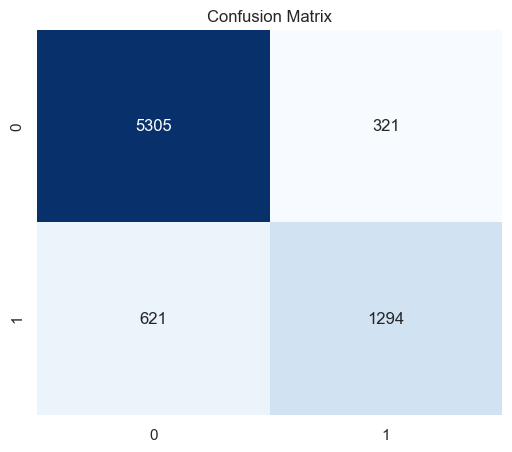

In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("income", axis=1)
Y = df["income"]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=74)

model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=150,
    random_state=74,
    eval_metric="logloss"
)
model.fit(train_X, train_Y)

pred_Y = model.predict(test_X)

cm = confusion_matrix(test_Y, pred_Y)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()


# XGBoost Tahminlerine Gore t-SNE Kume Dagilimi Grafigi

Asagidaki gorsel, XGBoost modelinin yaptigi **siniflandirma tahminlerini**, yuksek boyutlu test verisinin t-SNE algoritmasi ile 2 boyuta indirgenmis hali uzerinden gostermektedir.  

Amac, modelin **farkli siniflari (ornegin 0 ve 1) nasil ayirt ettigini**  gorsel olarak analiz etmektir. Renkler tahmin edilen siniflari temsil eder ve kumelenme yapisi, modelin siniflar arasindaki ayirt ediciligini ortaya koyar.  

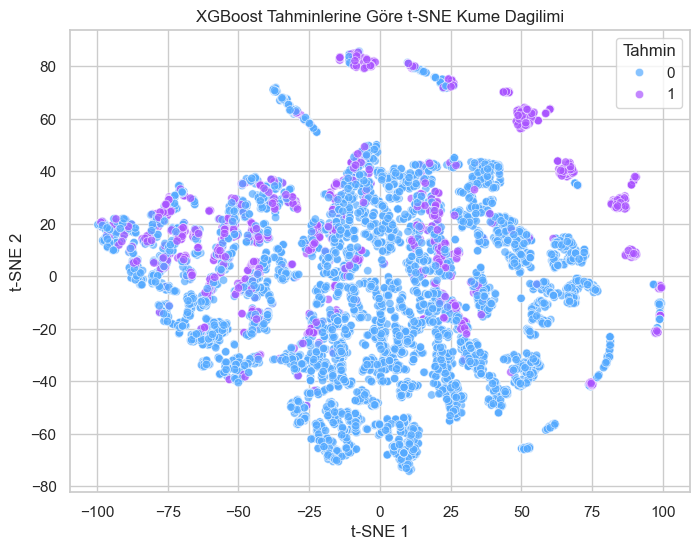

In [43]:
from sklearn.manifold import TSNE

plt.figure(figsize=(8,6))
tsne = TSNE(n_components=2, random_state=74, perplexity=30) #t-SNE nesnesi olusturduk n_components=2 demek veriyi iki boyuta indirgesin demektir bu kisimda tanimlari yapiyoruz.
X_embedded = tsne.fit_transform(test_X) #Burada daveriyi 2 boyutlu hale getiriyoruz.
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=pred_Y, palette='cool', alpha=0.7)
plt.title("XGBoost Tahminlerine Göre t-SNE Kume Dagilimi")
plt.xlabel("t-SNE 1") #X ekseninin adi
plt.ylabel("t-SNE 2") #Y Ekseninin adi
plt.legend(title='Tahmin')
plt.grid(True)
plt.show()



# Dogru ve Yanlis Siniflandirmalarin t-SNE Gorsellestirilmesi

Asagidaki gorsel, XGBoost modelinin verdigi **siniflandirma tahminlerinin dogrulugunu,** test verisi uzerinden gosterir. Yuksek boyutlu test verisi, t-SNE (t-distributed Stochastic Neighbor Embedding) algoritmasi ile 2 boyuta indirgenmistir.

Bu gorsellestirme ile, modelin **hangi verileri dogru, hangilerini yanlis siniflandirdigi** renkler araciligiyla ayirt edilebilir. "Dogru" siniflandirilanlar yesil, "Yanlis" olanlar ise kirmizi renkle temsil edilir. Bu sayede modelin hatalarini ve basarili oldugu bolgeleri gorsel olarak analiz etmek mumkundur.

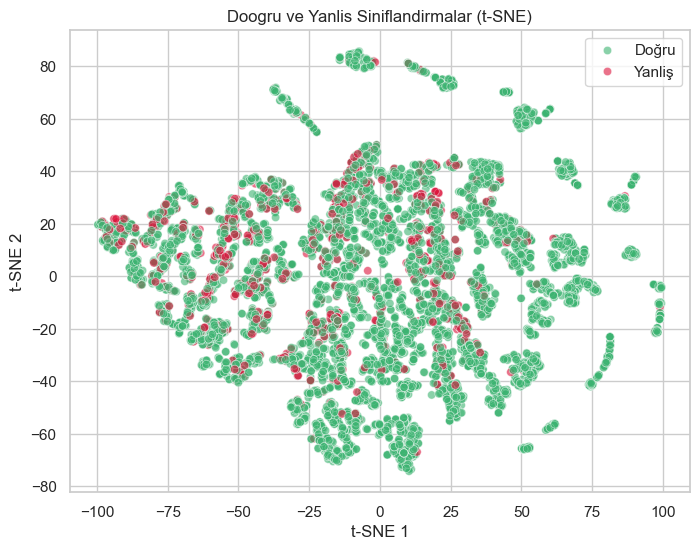

In [44]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.manifold import TSNE

#Tahminlerin dogrulugunu test etiketleriyle karsilastirmak icin correct degiskenini olusturdum
correct = test_Y.reset_index(drop=True) == pd.Series(pred_Y)
#reset_index ile test_Y ikdekslerini sifirliyoruz.
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_embedded[:, 0],#1.ci boyut verisini x ekseninde gormek icin
    y=X_embedded[:, 1], #2.boyut verisini Y ekseninde gormek icin
    hue=correct.map({True: "Doğru", False: "Yanliş"}), #Dogru ve yanlis tahminleri renklendiriyoruz.
    palette=["mediumseagreen", "crimson"],
    alpha=0.6
)
plt.title("Doogru ve Yanlis Siniflandirmalar (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()



Ustteki grafikle bu grafik gorsel olarak birbirine cok benzese de farklidir cunku burada renkler modelin dogru ve yanlis siniflandirmalarini gosterir ustteki grafikte ise renkler modelin tahmin ettigi siniflari temsil eder.

# XGBoost Modeline Ait ROC Egrisi

ROC Egrisi (Receiver Operating Characteristic Curve), modelin siniflandirma performansini farkli esik degerlerinde degerlendirmek icin kullanilir. Grafik, yanlis pozitif orani (False Positive Rate) ile dogru pozitif orani (True Positive Rate) arasindaki iliskiyi gosterir. Egrinin altindaki alan (AUC - Area Under Curve) ise modelin genel basarisini sayisal olarak ifade eder. AUC degeri 1’e ne kadar yakinsa model o kadar iyidir.

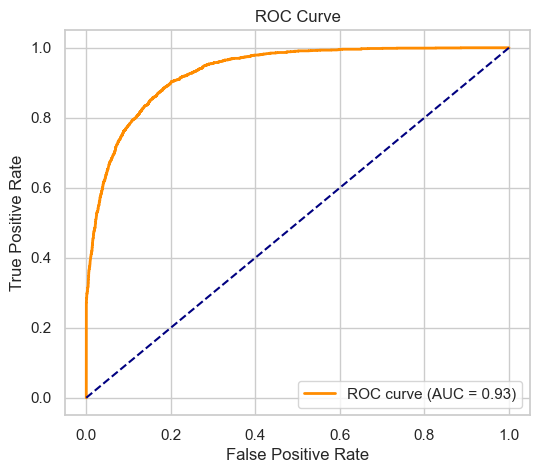

In [45]:
prob_Y = model.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_Y, prob_Y)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
